# Ames city in Iowa State House Proce Prediction- Regression

### Norbert Wiśniewski, ING, grupa Warszawa
#### email: norbert.wisniewski@ingbank.pl
#### email: wisniewski.norbert@gmail.com

## 1. Loading a dataSet with Ames houses into DataFrames (variables and price )

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import IPython


from IPython.display import display, HTML


dataset = pd.read_csv("./ames2000_NAfix.csv")

variables = dataset.copy()


variables.pop('SalePrice')
print(variables.shape)

variables_all = variables.copy()


#create dataframe for target 'price' column
price =  dataset.filter(['SalePrice'])

print(price.shape)

(2000, 79)
(2000, 1)


In [2]:
dataset.describe()

,MS.SubClass,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,...,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold,SalePrice
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,56.945000,10296.665000,6.082000,5.574000,1971.079500,1984.013500,1158.715500,334.380500,4.379000,1497.475000,...,93.058500,46.335000,23.936500,2.116000,15.681500,2.934000,42.51300,6.217500,2007.799500,180240.902000
std,42.699281,8828.208491,1.387169,1.105502,29.985426,20.881771,379.701015,427.519973,42.555738,498.561719,...,126.633128,65.685433,66.144388,20.668119,54.270505,41.080828,440.83108,2.726336,1.316118,78461.927874
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,407.000000,0.000000,0.000000,407.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,2006.000000,12789.000000
25%,20.000000,7500.000000,5.000000,5.000000,1954.000000,1965.000000,877.750000,0.000000,0.000000,1126.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,4.000000,2007.000000,129000.000000
50%,50.000000,9465.000000,6.000000,5.000000,1972.000000,1993.000000,1088.000000,0.000000,0.000000,1447.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.00000,6.000000,2008.000000,160000.000000
75%,70.000000,11500.000000,7.000000,6.000000,2000.000000,2004.000000,1391.250000,703.250000,0.000000,1734.000000,...,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.00000,8.000000,2009.000000,213492.500000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,4692.000000,2065.000000,697.000000,5642.000000,...,870.000000,742.000000,1012.000000,320.000000,480.000000,800.000000,15500.00000,12.000000,2010.000000,755000.000000


In [3]:
variables.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 79 columns):
MS.SubClass        2000 non-null int64
MS.Zoning          2000 non-null object
Lot.Frontage       2000 non-null object
Lot.Area           2000 non-null int64
Street             2000 non-null object
Alley              2000 non-null object
Lot.Shape          2000 non-null object
Land.Contour       2000 non-null object
Utilities          2000 non-null object
Lot.Config         2000 non-null object
Land.Slope         2000 non-null object
Neighborhood       2000 non-null object
Condition.1        2000 non-null object
Condition.2        2000 non-null object
Bldg.Type          2000 non-null object
House.Style        2000 non-null object
Overall.Qual       2000 non-null int64
Overall.Cond       2000 non-null int64
Year.Built         2000 non-null int64
Year.Remod.Add     2000 non-null int64
Roof.Style         2000 non-null object
Roof.Matl          2000 non-null object
Exterior.1st       

In [4]:
variables.head()

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,120,RL,34,3901,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,8,2007,New,Partial
1,20,RL,70,8400,Pave,None,Reg,Lvl,AllPub,Corner,...,0,0,None,MnPrv,None,0,4,2010,WD,Normal
2,85,RL,60,7200,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,MnPrv,None,0,4,2009,WD,Normal
3,90,RL,64,7018,Pave,None,Reg,Bnk,AllPub,Inside,...,0,0,None,None,None,0,6,2009,WD,Alloca
4,60,RL,111,16259,Pave,None,Reg,Lvl,AllPub,Corner,...,0,0,None,None,None,0,9,2006,New,Partial


## Missing data plot

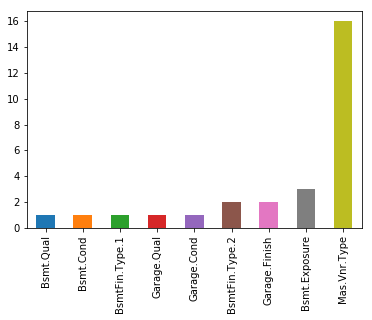

In [6]:
missing = dataset.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

#missinng values will be replaced by median, outliers don't have influence on median

## 2. Categorical (non numeric) Variables 

In [5]:
#Define function to display histogram of given column
def showCategoryHist(df, colmnName):
    df[colmnName].value_counts()
    plt.figure(figsize=(16, 6))
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    subax = sns.countplot(df[colmnName])
    subCats =  len(df.groupby(colmnName).agg(colmnName))
    plt.title("{0} number of categories {1}".format(str(colmnName),int(subCats)))
    subax.tick_params(axis=u'both', which=u'both',length=0)
    

#subCats =  len(df.groupby(colName).agg(colName))
def showBoxPlot(dataframe, col):
    dataframe.boxplot(by =str(col), column =['SalePrice'], grid = False)
    pass


# Categories Nominals

In [6]:
obj_df = variables.select_dtypes(include=['object']).copy()
obj_df.head()


,MS.Zoning,Lot.Frontage,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,...,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Pool.QC,Fence,Misc.Feature,Sale.Type,Sale.Condition
0,RL,34,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,...,2,631,TA,TA,Y,None,None,None,New,Partial
1,RL,70,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Nonemes,...,2,525,TA,TA,Y,None,MnPrv,None,WD,Normal
2,RL,60,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,1,396,TA,TA,Y,None,MnPrv,None,WD,Normal
3,RL,64,Pave,None,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,...,2,400,TA,TA,Y,None,None,None,WD,Alloca
4,RL,111,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,...,3,840,TA,TA,Y,None,None,None,New,Partial


## Category Nominals

In [7]:
nominals = variables[[
#'PID' not found in data,
'Heating', 
'MS.SubClass',
'MS.Zoning',
'Street',
'Alley',
'Land.Contour',
'Lot.Config',
'Neighborhood',
'Condition.1',
'Condition.2',
'Bldg.Type',
'House.Style',
 'Central.Air',
 'Garage.Type',
 'Misc.Feature',
 'Roof.Style',
 'Roof.Matl',
 'Exterior.1st',
 'Exterior.2nd',   
 'Mas.Vnr.Type',
 'Foundation',
 'Sale.Type',
 'Sale.Condition'  
]].copy()

nominals.head()

,Heating,MS.SubClass,MS.Zoning,Street,Alley,Land.Contour,Lot.Config,Neighborhood,Condition.1,Condition.2,...,Garage.Type,Misc.Feature,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Foundation,Sale.Type,Sale.Condition
0,GasA,120,RL,Pave,None,Lvl,Inside,NridgHt,Norm,Norm,...,Attchd,None,Gable,CompShg,VinylSd,VinylSd,Stone,PConc,New,Partial
1,GasA,20,RL,Pave,None,Lvl,Corner,Nonemes,Norm,Norm,...,Attchd,None,Gable,CompShg,Plywood,Plywood,None,CBlock,WD,Normal
2,GasA,85,RL,Pave,None,Lvl,Inside,CollgCr,Norm,Norm,...,Detchd,None,Gable,CompShg,WdShing,HdBoard,None,CBlock,WD,Normal
3,GasA,90,RL,Pave,None,Bnk,Inside,SawyerW,Norm,Norm,...,Attchd,None,Gable,CompShg,Plywood,Plywood,None,Slab,WD,Alloca
4,GasA,60,RL,Pave,None,Lvl,Corner,NridgHt,Norm,Norm,...,Attchd,None,Gable,CompShg,VinylSd,VinylSd,Stone,PConc,New,Partial


Category: Heating
Category: MS.SubClass
Category: MS.Zoning
Category: Street
Category: Alley
Category: Land.Contour
Category: Lot.Config
Category: Neighborhood
Category: Condition.1
Category: Condition.2
Category: Bldg.Type
Category: House.Style


/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Category: Central.Air
Category: Garage.Type
Category: Misc.Feature
Category: Roof.Style
Category: Roof.Matl
Category: Exterior.1st
Category: Exterior.2nd
Category: Mas.Vnr.Type
Category: Foundation
Category: Sale.Type
Category: Sale.Condition


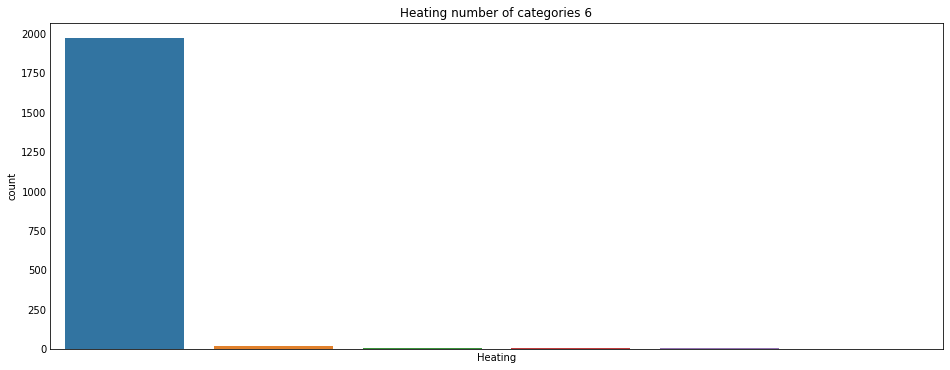

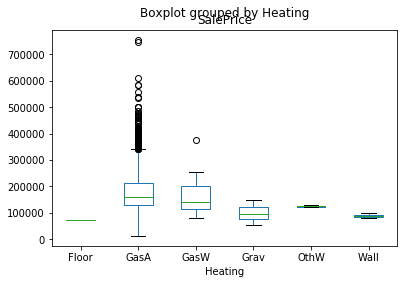

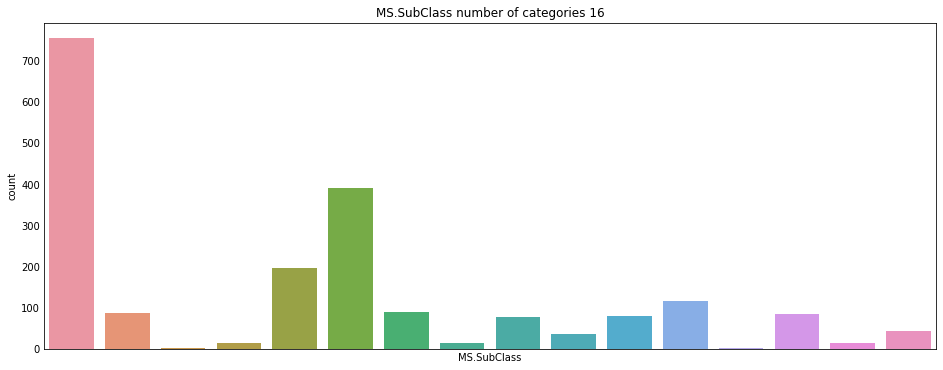

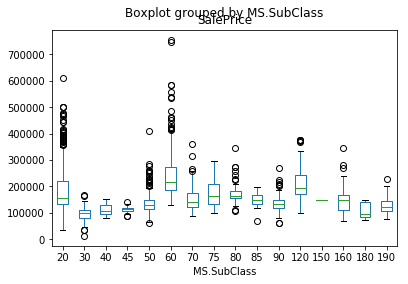

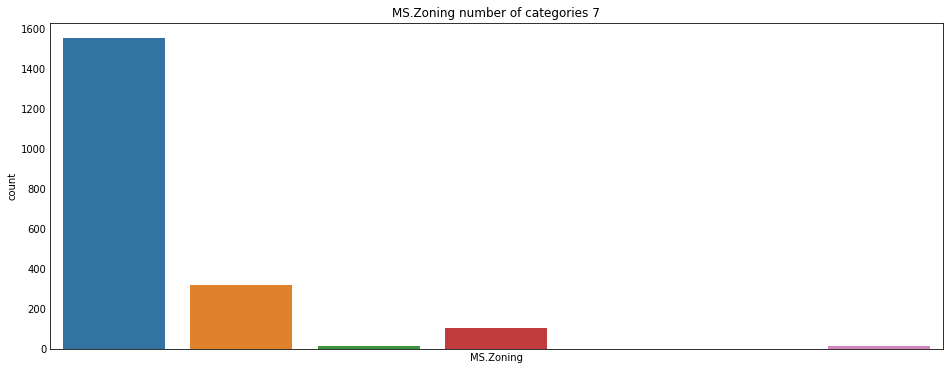

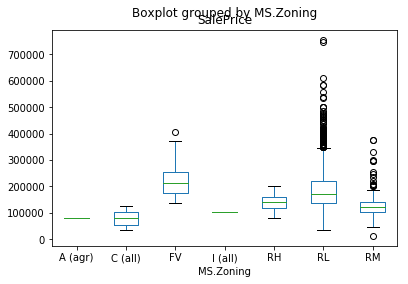

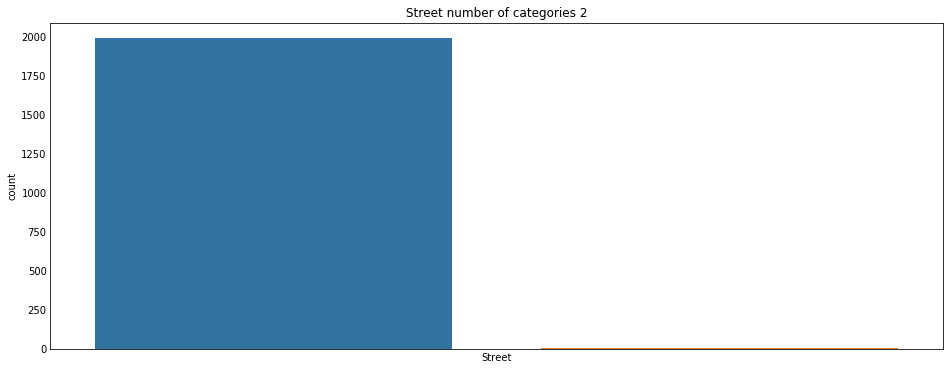

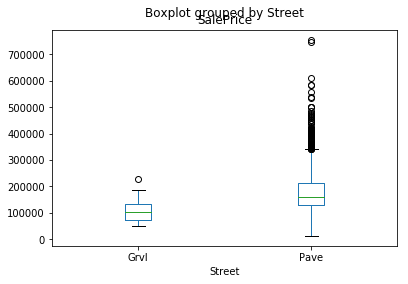

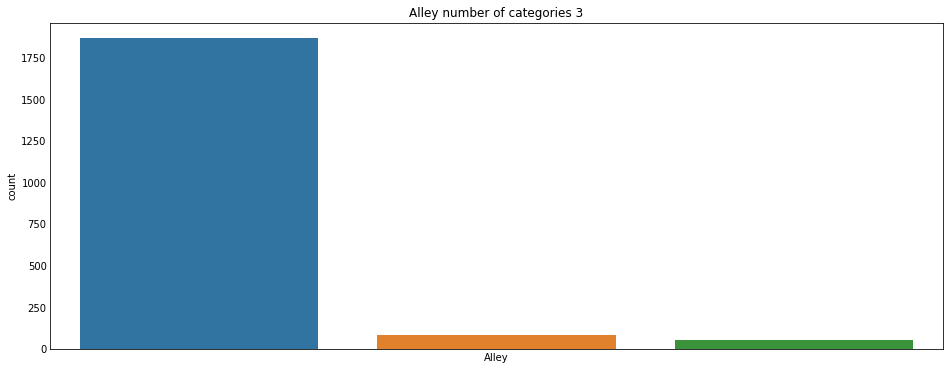

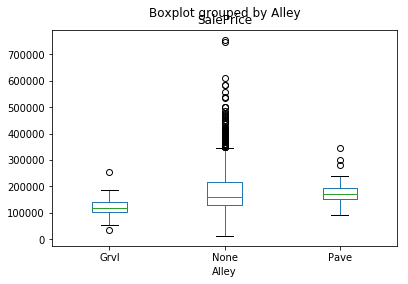

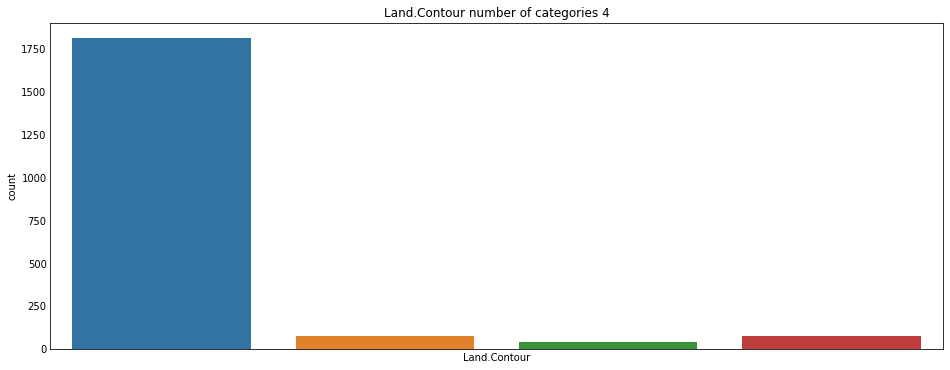

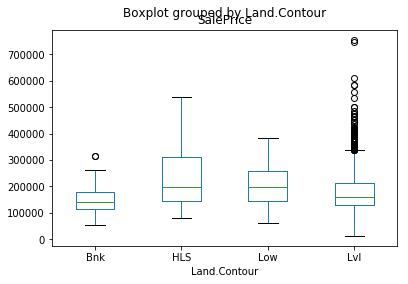

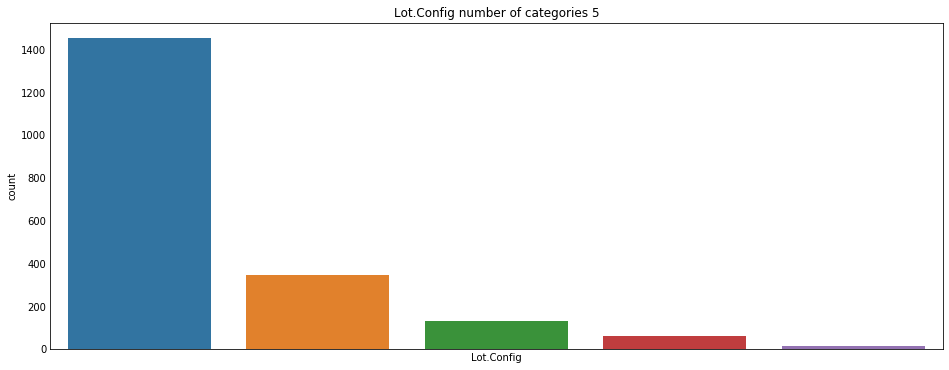

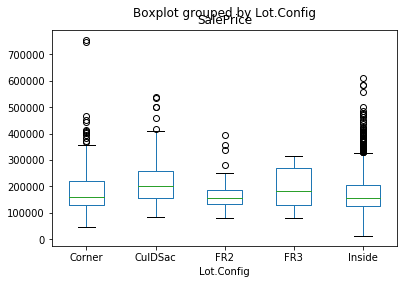

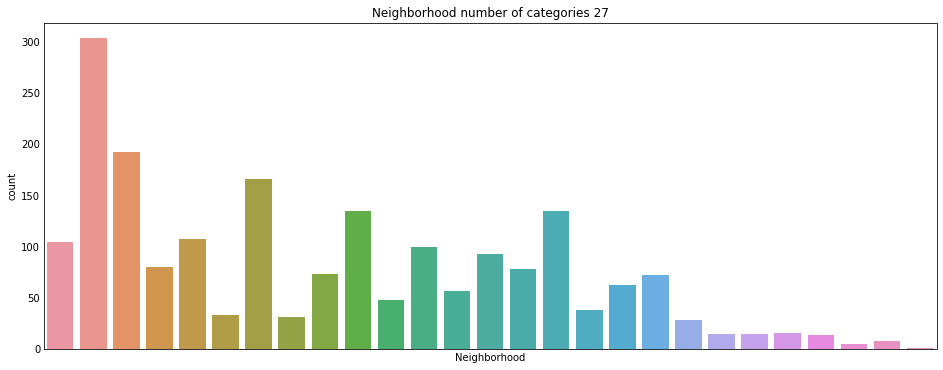

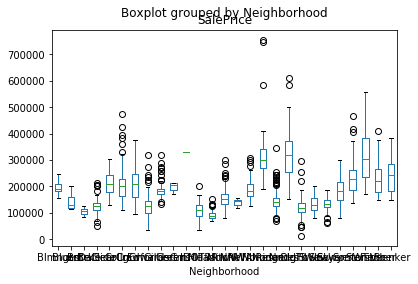

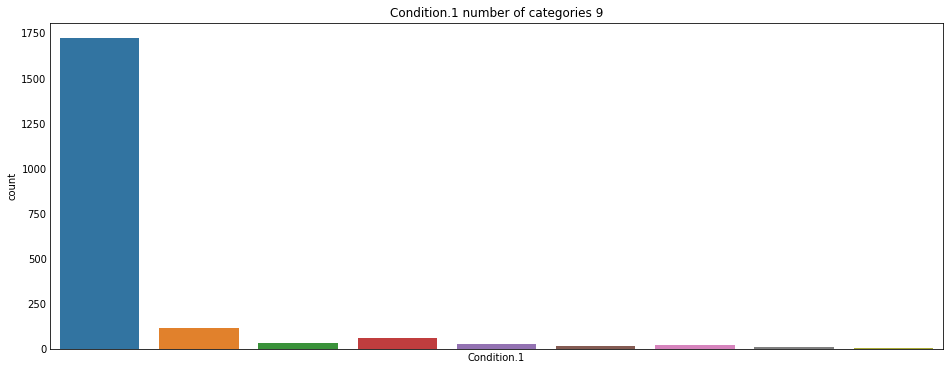

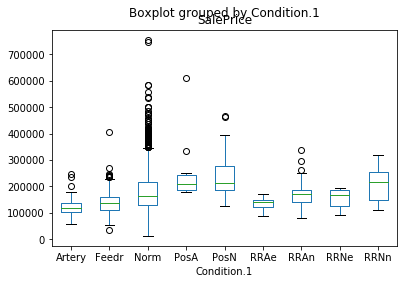

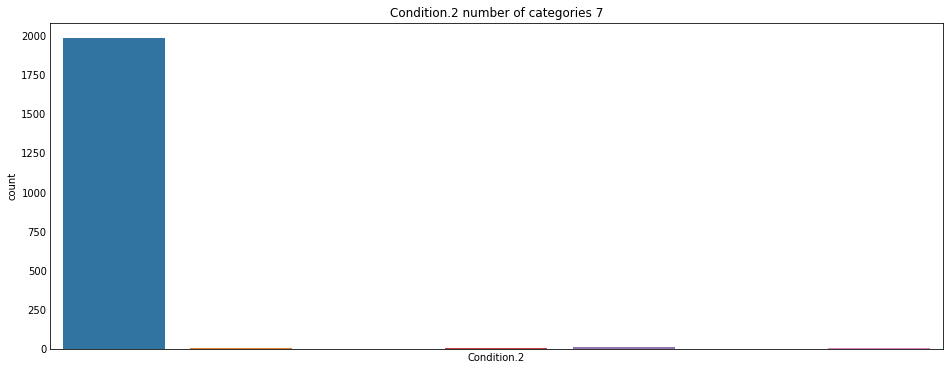

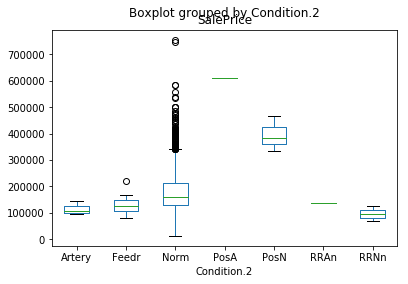

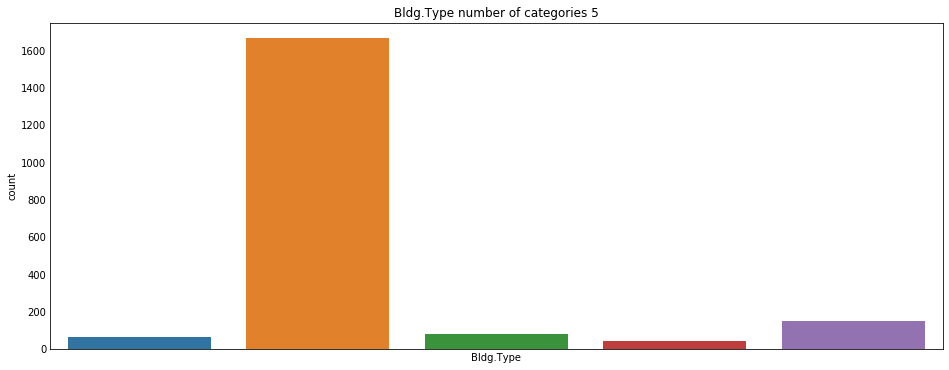

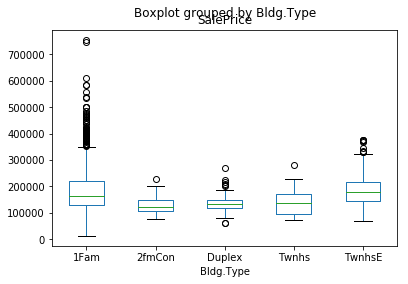

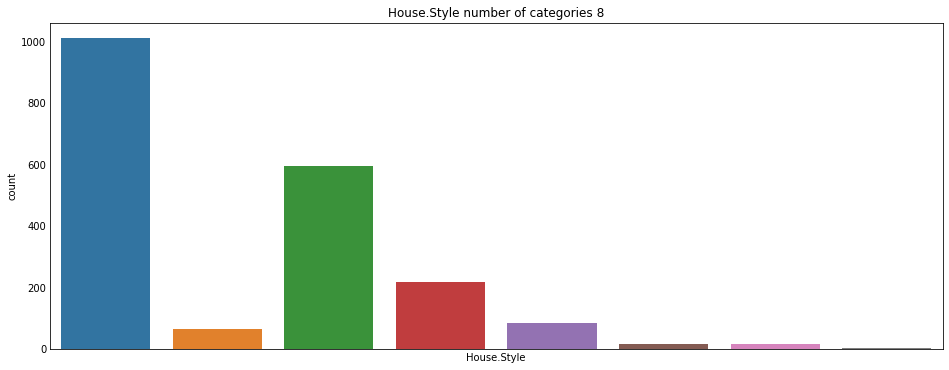

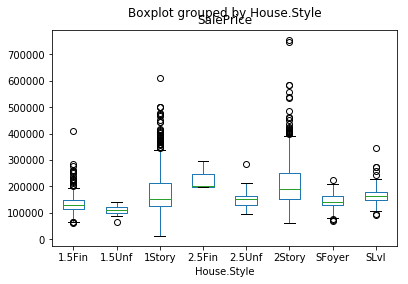

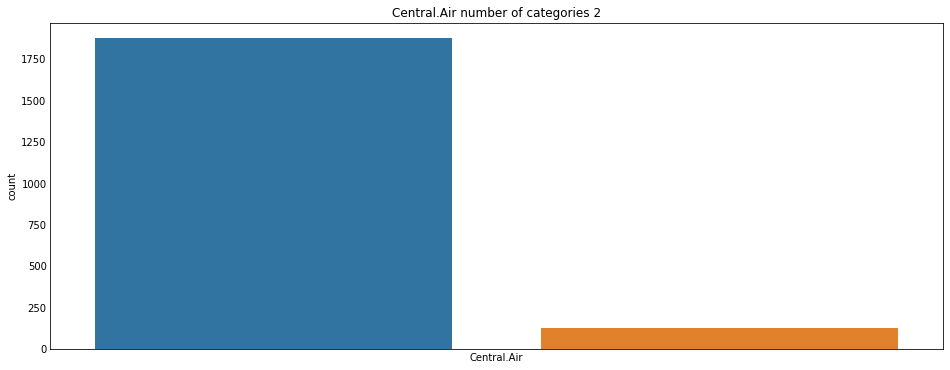

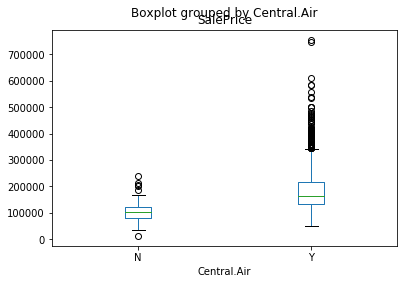

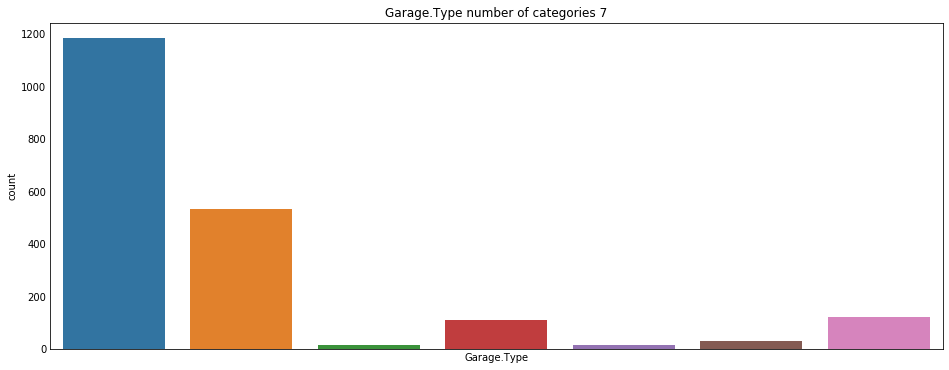

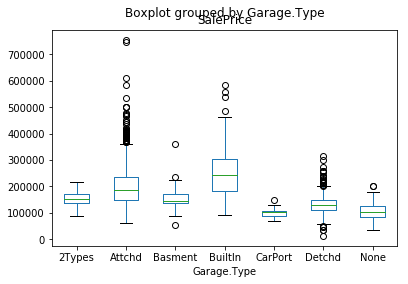

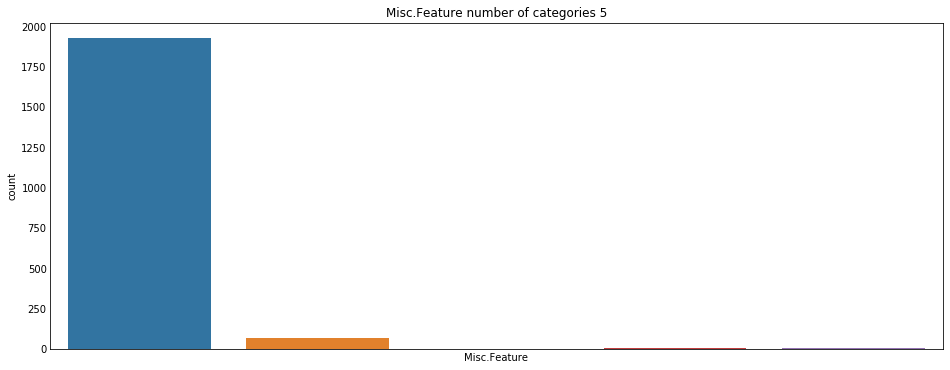

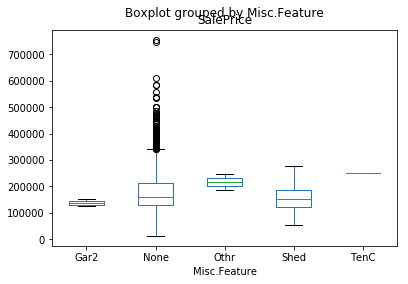

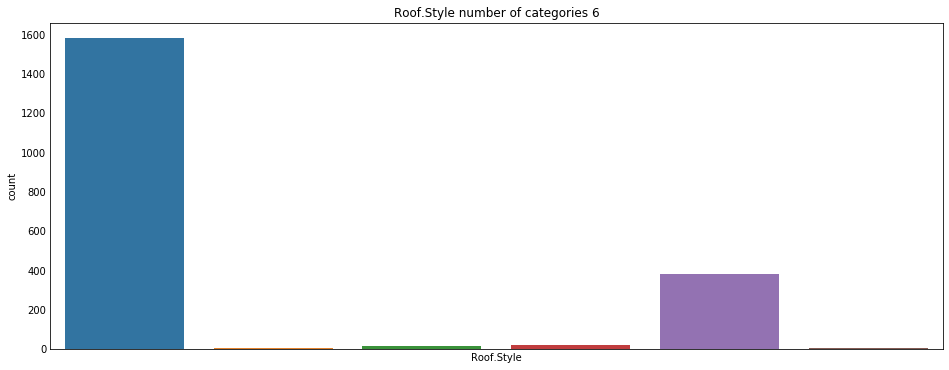

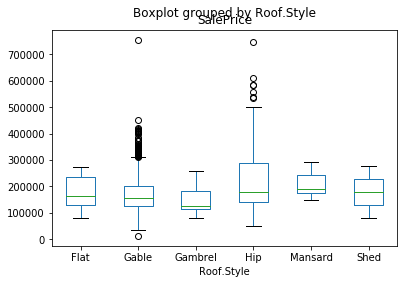

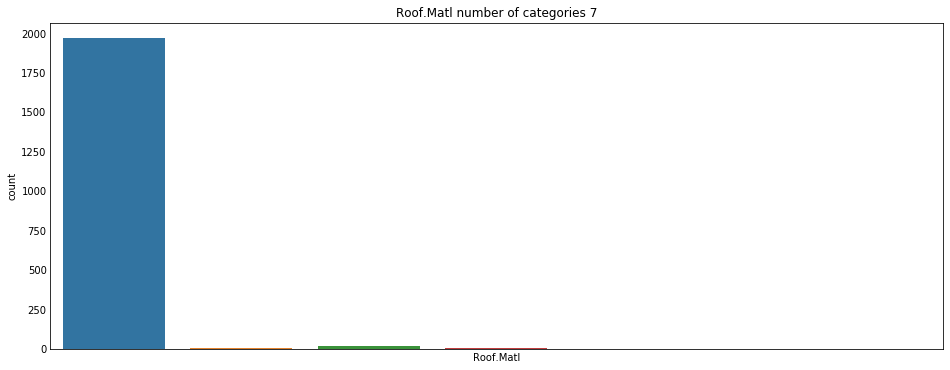

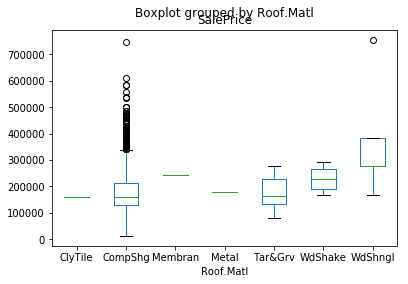

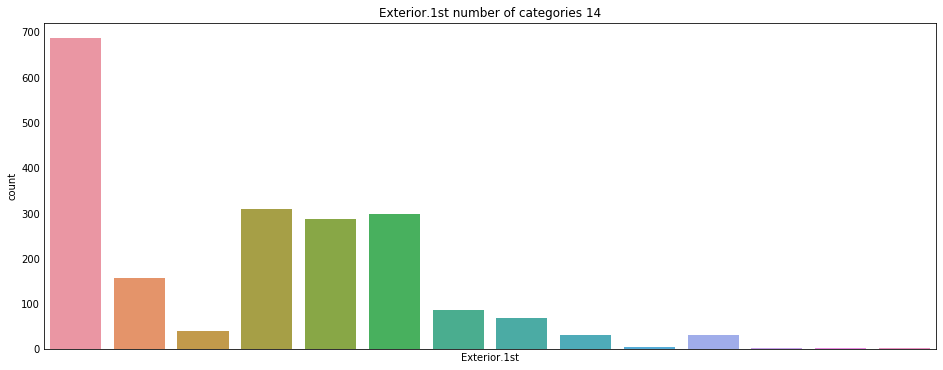

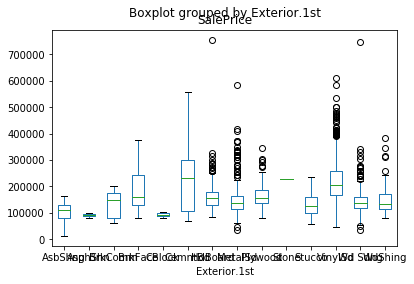

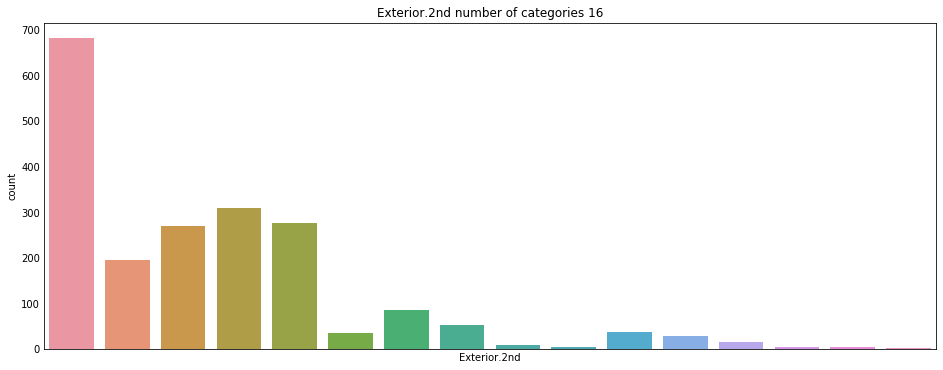

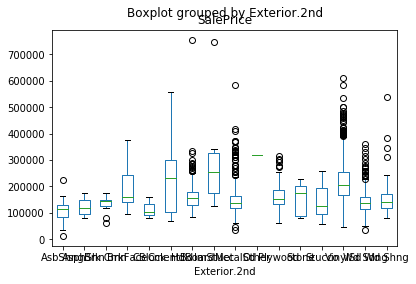

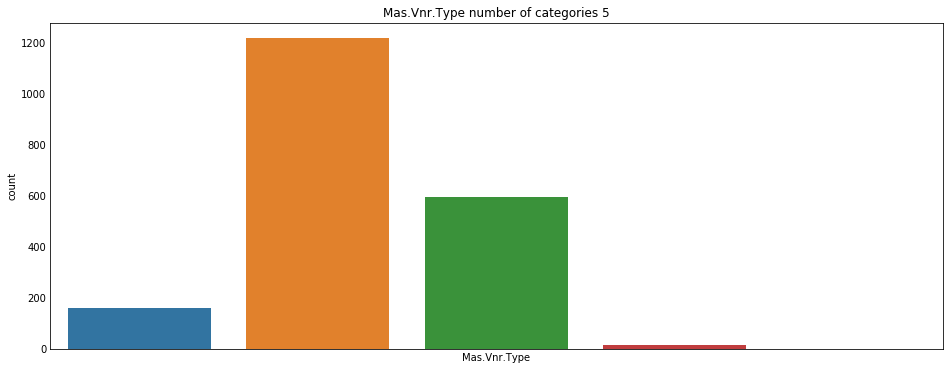

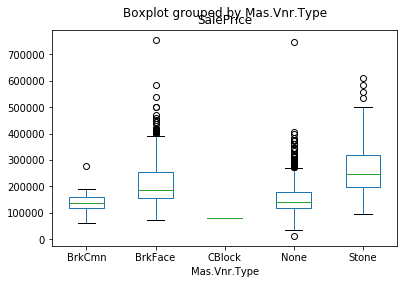

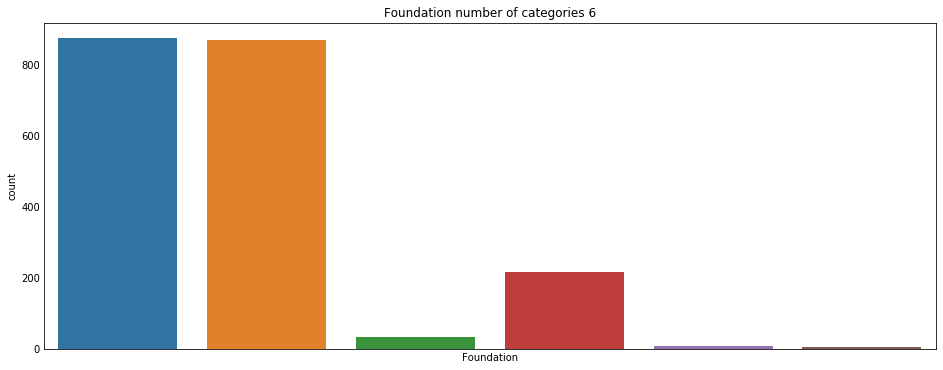

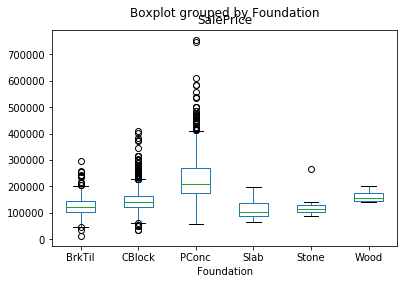

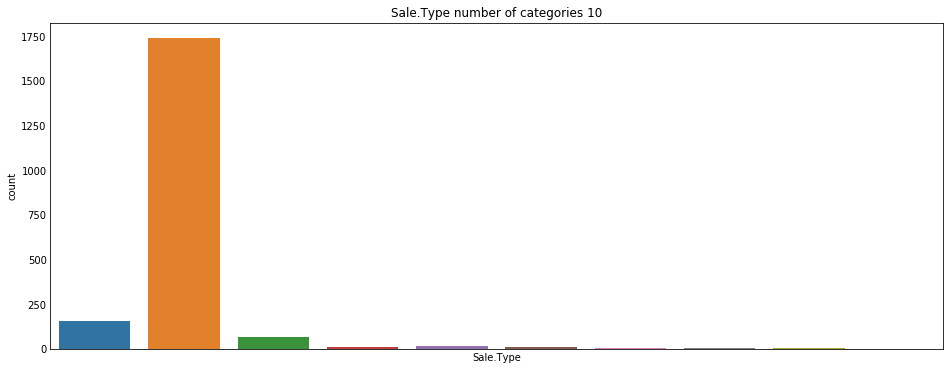

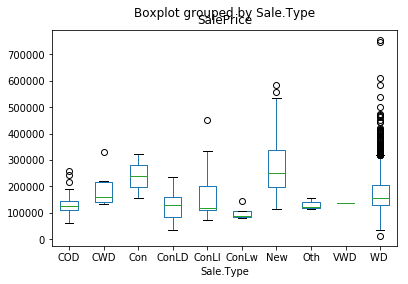

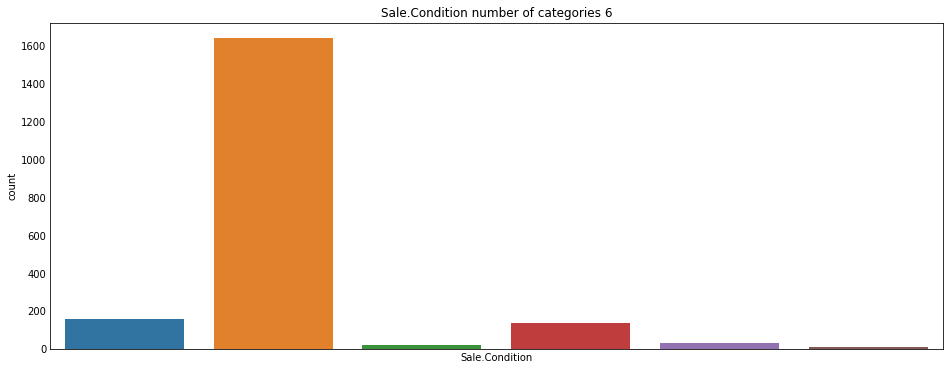

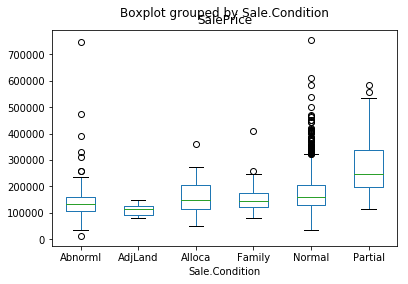

In [10]:
for cat in list(nominals):
    print("Category: "+str(cat))
    showCategoryHist(nominals, str(cat))
    showBoxPlot(col=str(cat), dataframe=nominals.join(price))


## Choosing categories nominals 

In [11]:
nominal_choosed = nominals[[
#'PID' not found in data,
'Heating', 
'MS.SubClass',
'MS.Zoning',
#'Street',
#'Alley',
'Land.Contour',
'Lot.Config',
'Neighborhood',
'Condition.1',
'Condition.2',
'Bldg.Type',
'House.Style',
 'Central.Air',
 'Garage.Type',
 'Misc.Feature',
 'Roof.Style',
 'Roof.Matl',
 'Exterior.1st',
 'Exterior.2nd',   
 'Mas.Vnr.Type',
 'Foundation',
 'Sale.Type',
 'Sale.Condition'  
]].copy()


for cat in list(nominal_choosed):
    print("Category: "+str(cat))
    nominal_choosed = pd.get_dummies(nominal_choosed, columns=[str(cat)])
    
nominal_choosed.head()    

Category: Heating
Category: MS.SubClass
Category: MS.Zoning
Category: Land.Contour
Category: Lot.Config
Category: Neighborhood
Category: Condition.1
Category: Condition.2
Category: Bldg.Type
Category: House.Style
Category: Central.Air
Category: Garage.Type
Category: Misc.Feature
Category: Roof.Style
Category: Roof.Matl
Category: Exterior.1st
Category: Exterior.2nd
Category: Mas.Vnr.Type
Category: Foundation
Category: Sale.Type
Category: Sale.Condition


,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,MS.SubClass_20,MS.SubClass_30,MS.SubClass_40,MS.SubClass_45,...,Sale.Type_New,Sale.Type_Oth,Sale.Type_VWD,Sale.Type_WD,Sale.Condition_Abnorml,Sale.Condition_AdjLand,Sale.Condition_Alloca,Sale.Condition_Family,Sale.Condition_Normal,Sale.Condition_Partial
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


## Categories Ordinals 

Category: Lot.Shape
Category: Utilities
Category: Land.Slope
Category: Overall.Qual
Category: Overall.Cond
Category: Exter.Qual
Category: Exter.Cond
Category: Bsmt.Qual
Category: Bsmt.Cond
Category: Bsmt.Exposure
Category: BsmtFin.Type.1
Category: BsmtFin.Type.2
Category: Heating.QC
Category: Electrical
Category: Kitchen.Qual
Category: Functional
Category: Fireplace.Qu
Category: Garage.Finish
Category: Garage.Qual
Category: Garage.Cond
Category: Paved.Drive
Category: Pool.QC
Category: Fence


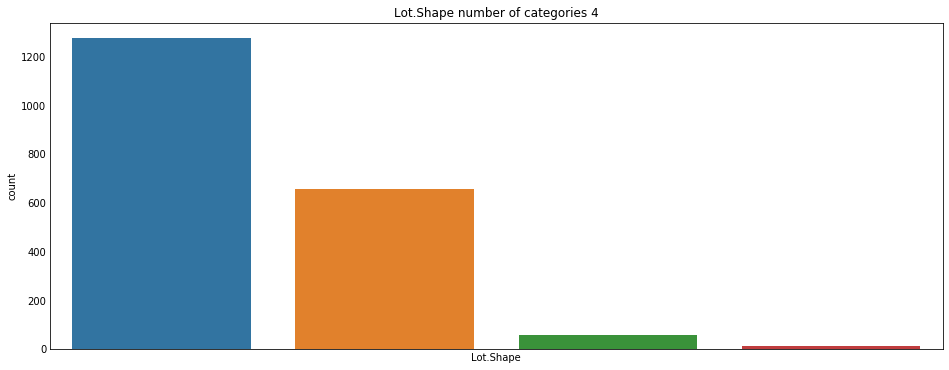

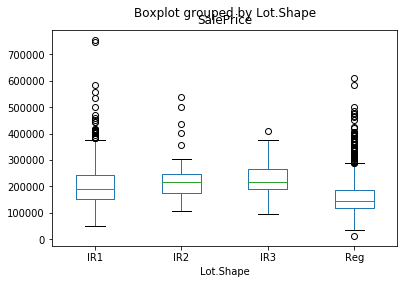

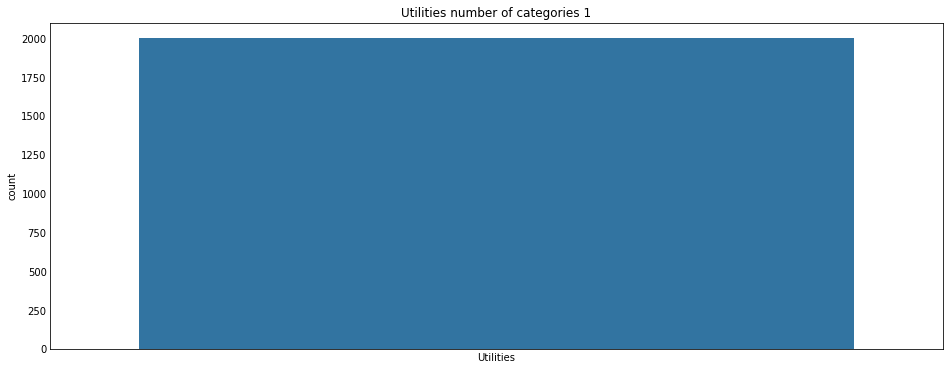

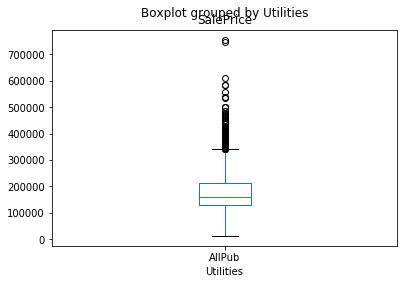

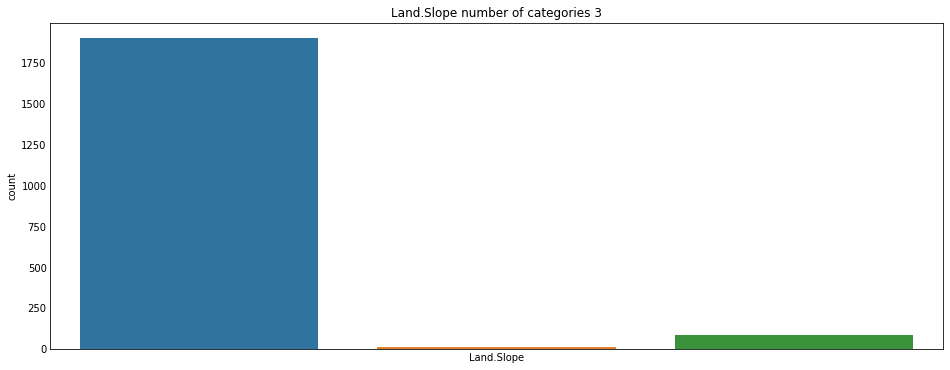

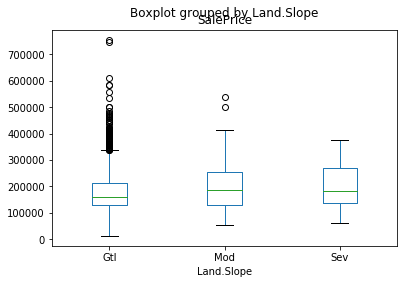

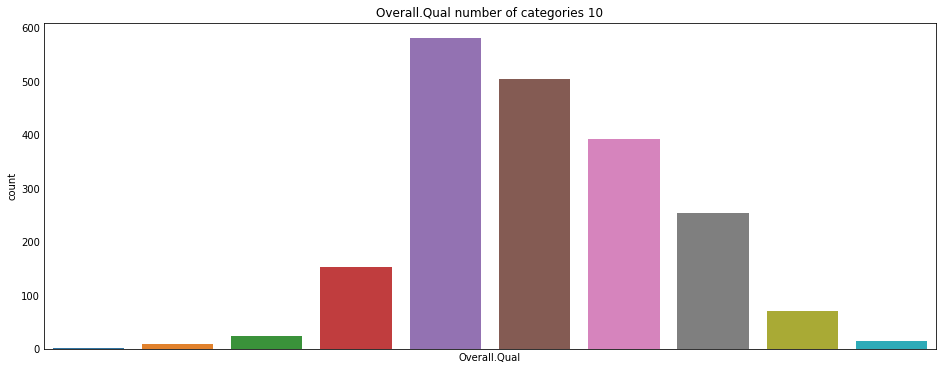

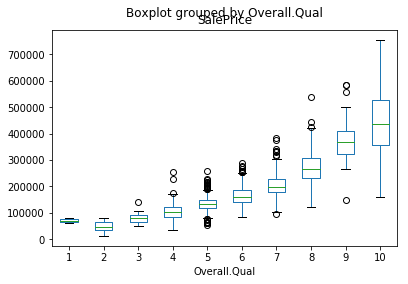

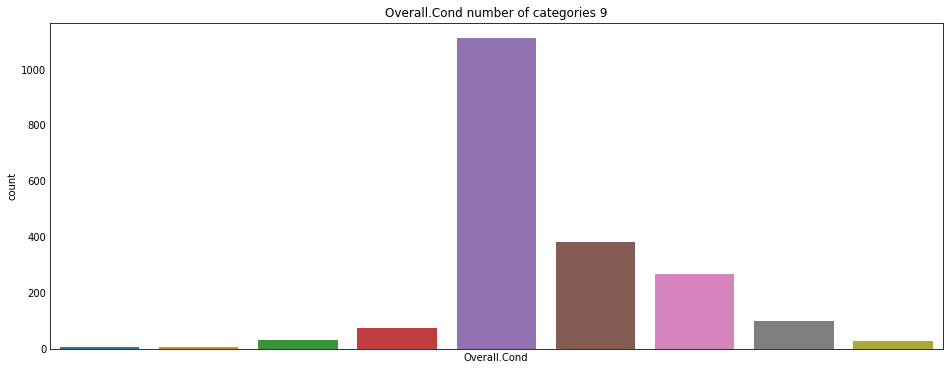

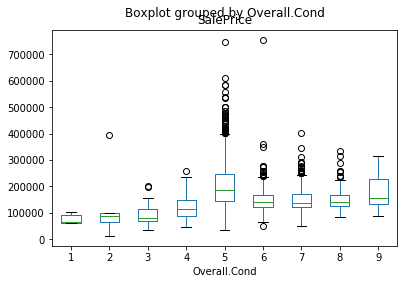

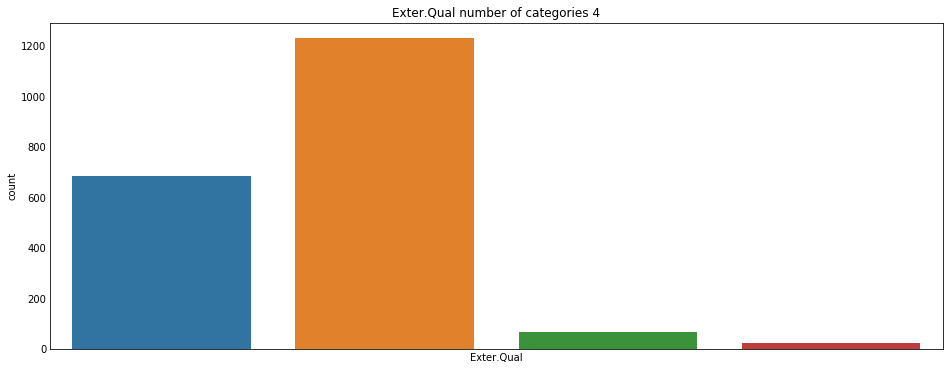

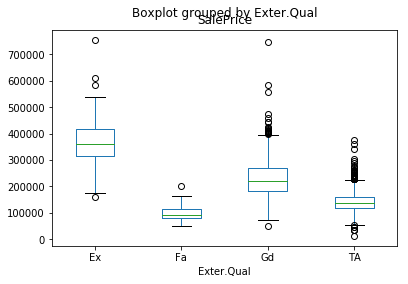

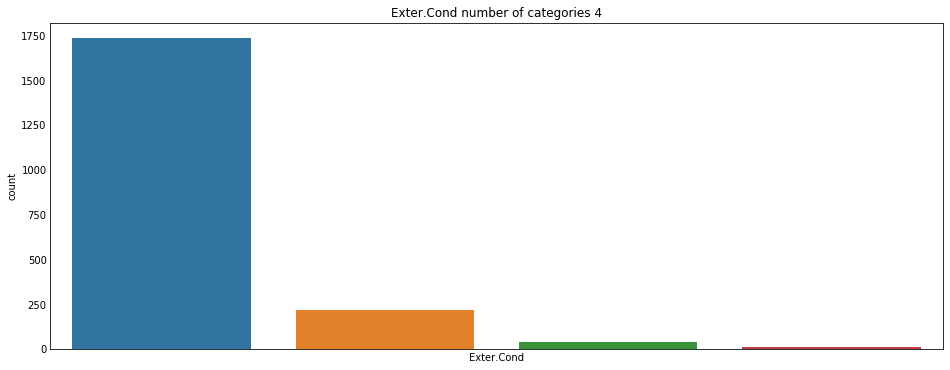

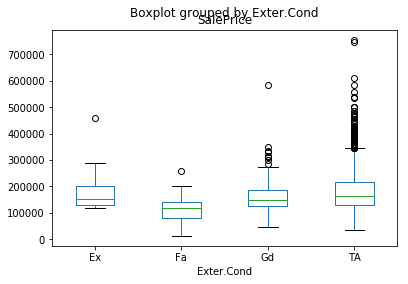

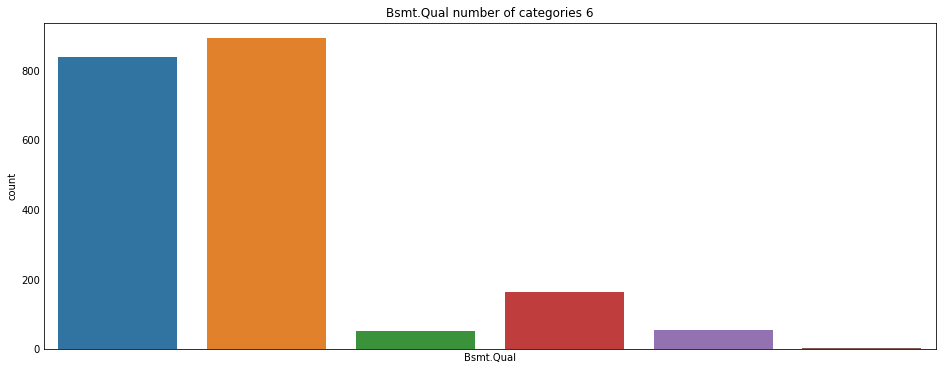

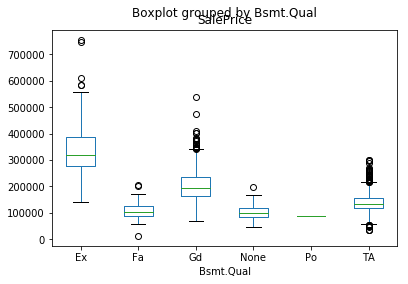

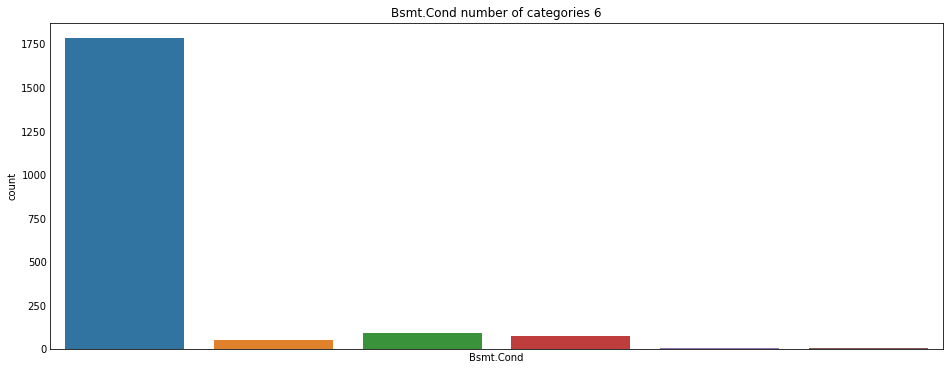

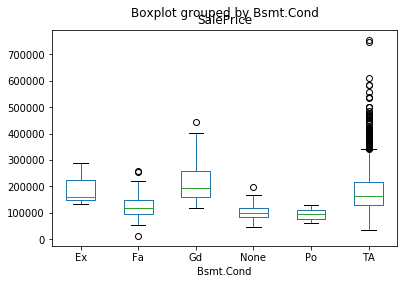

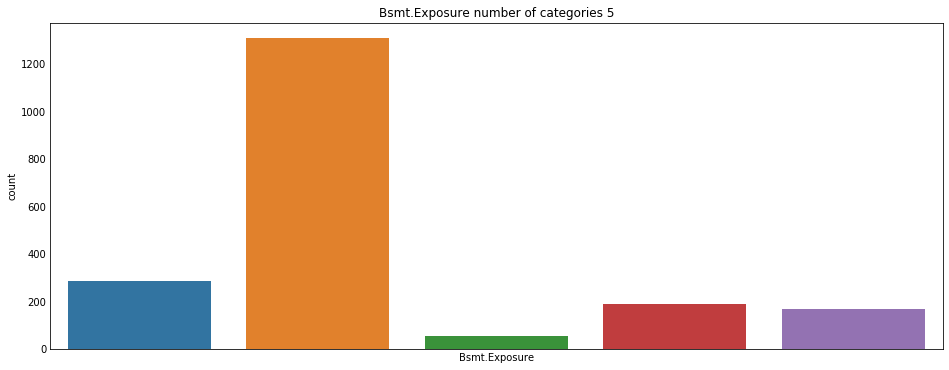

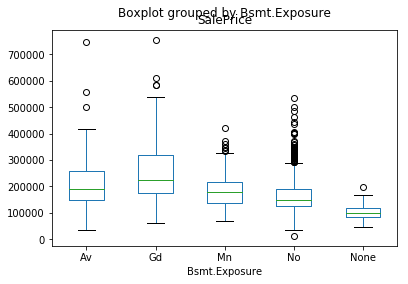

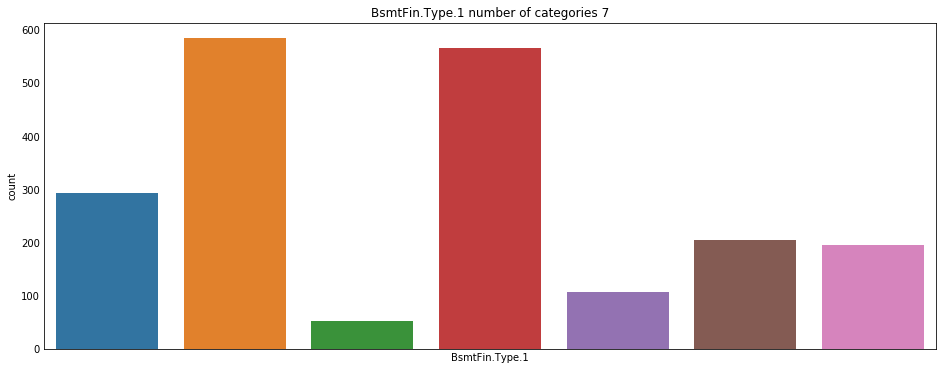

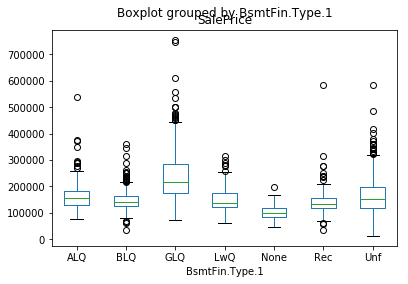

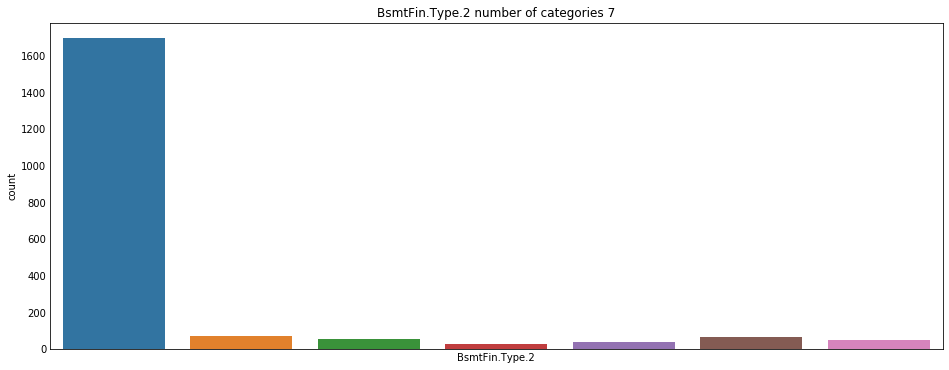

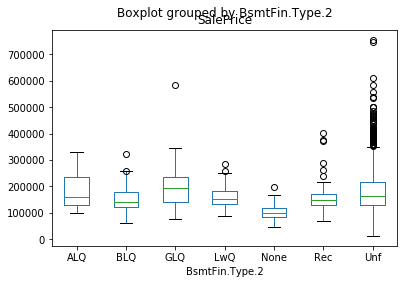

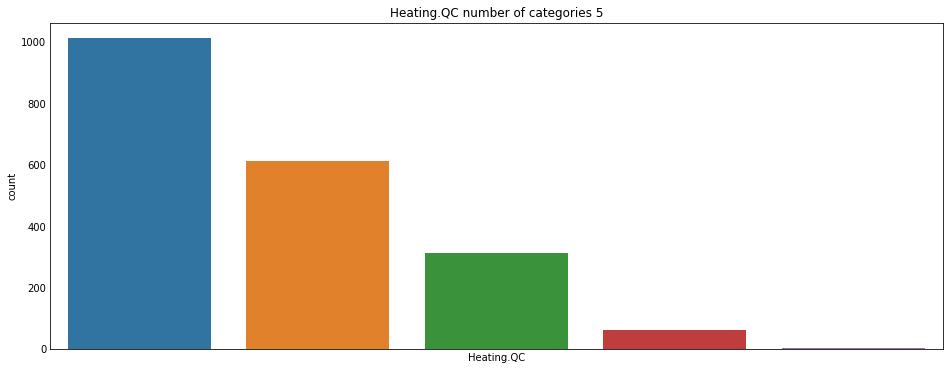

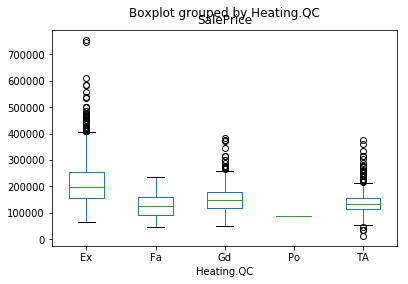

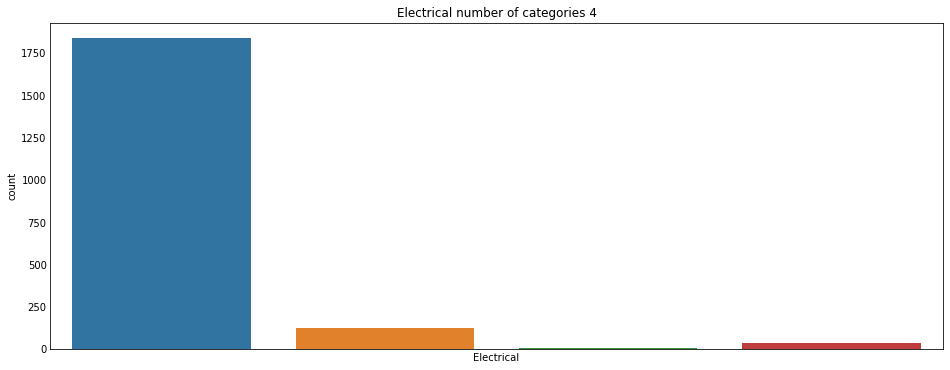

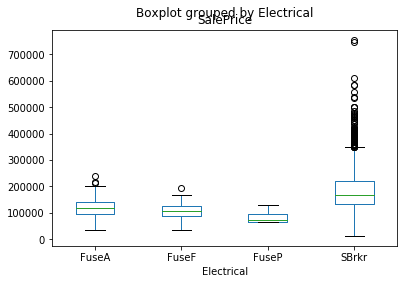

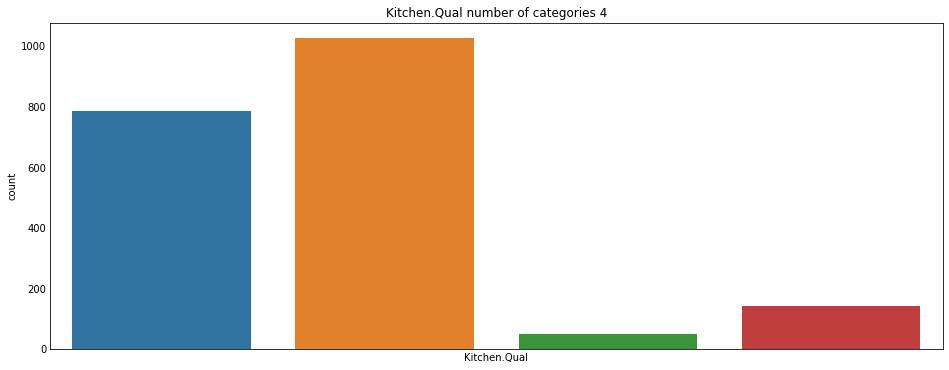

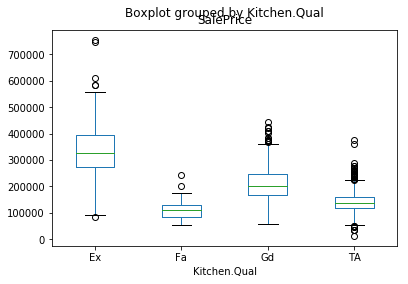

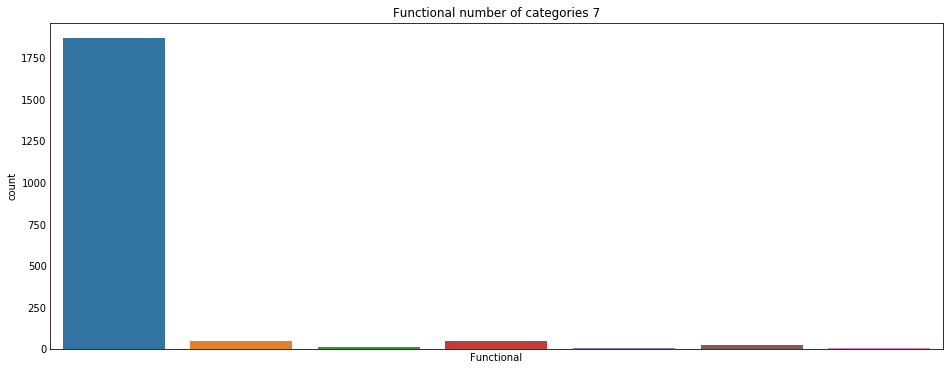

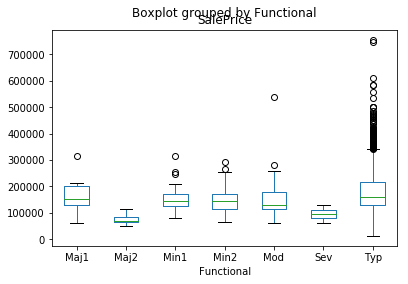

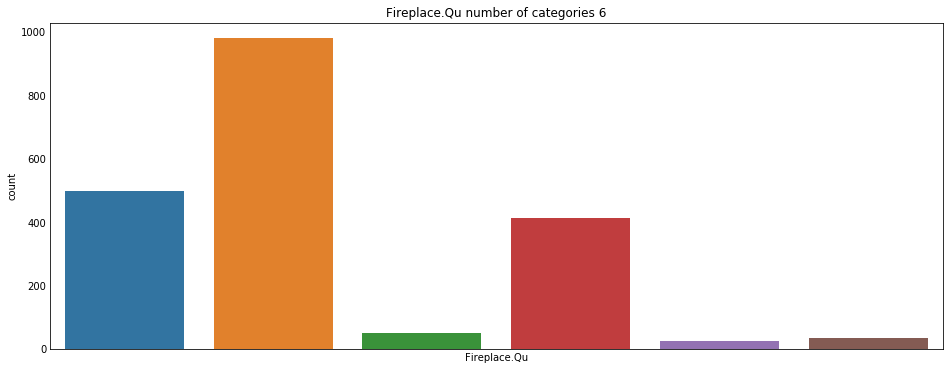

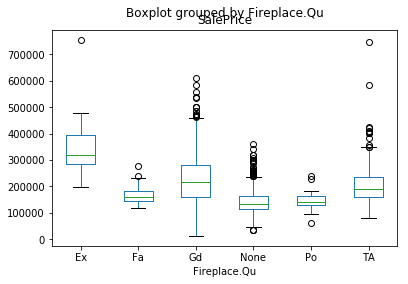

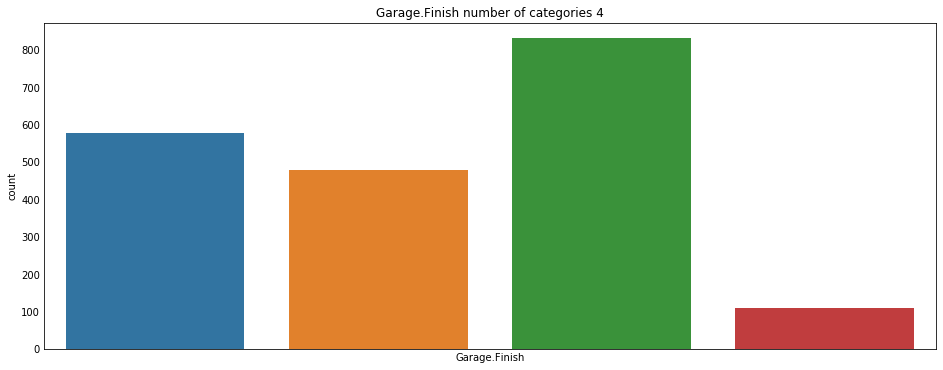

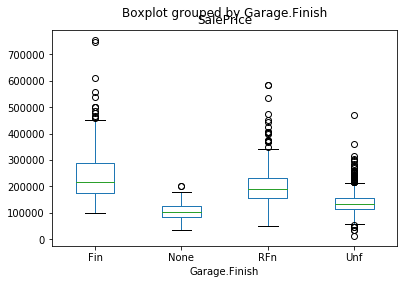

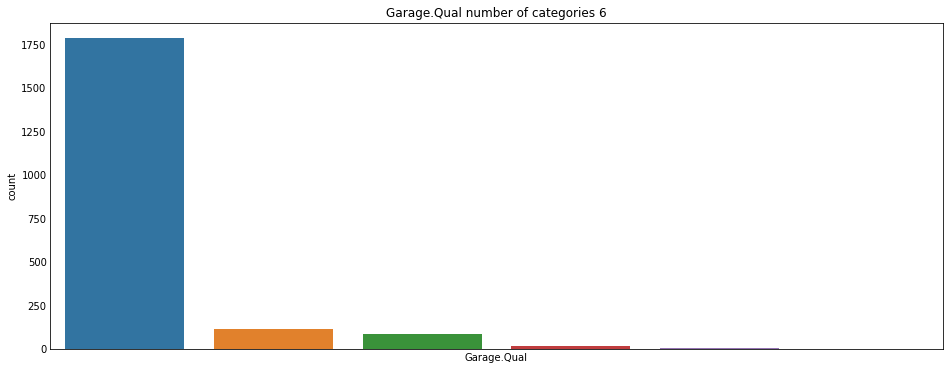

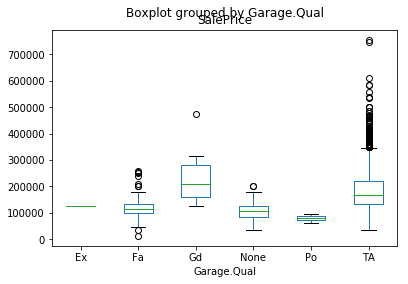

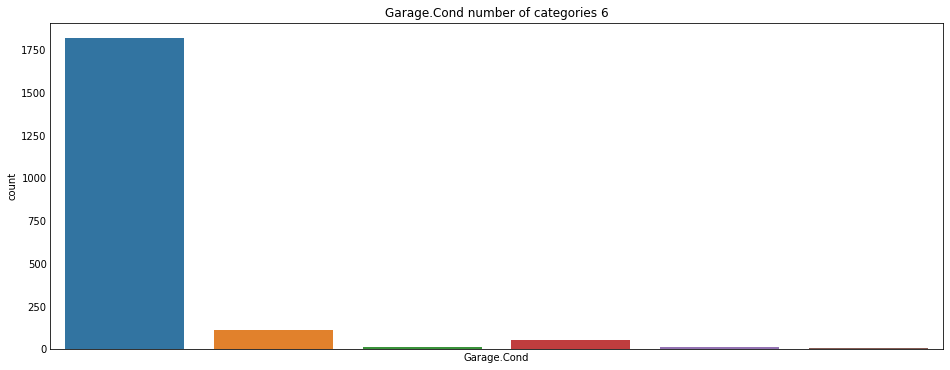

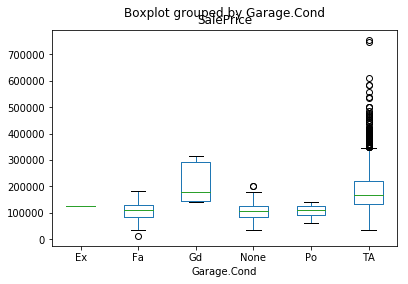

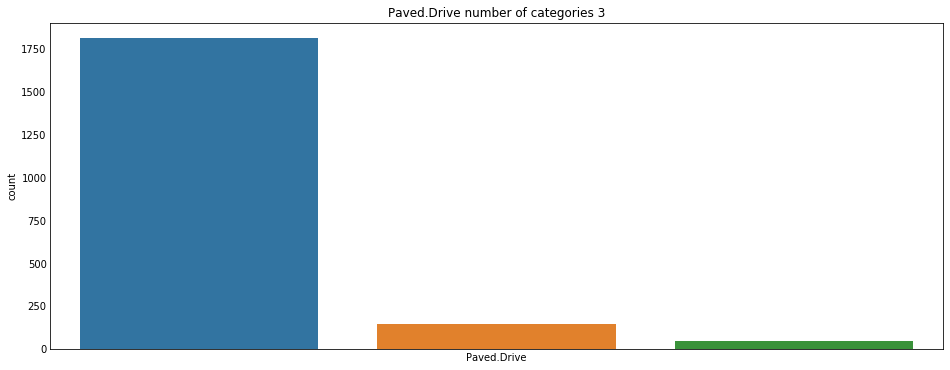

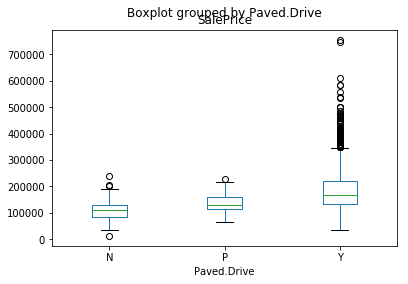

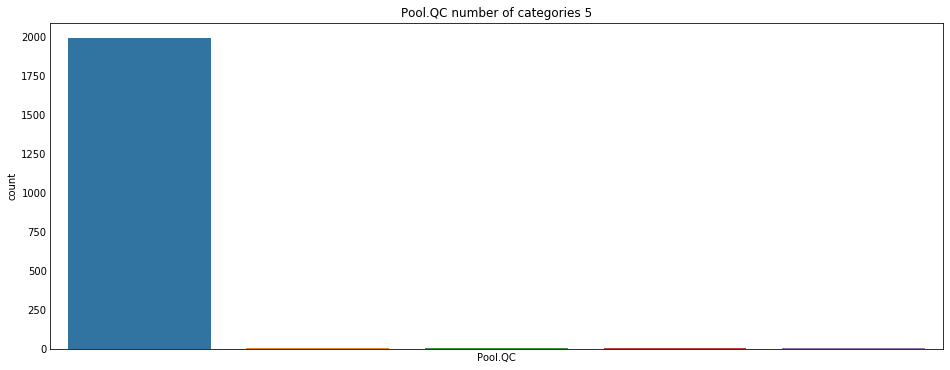

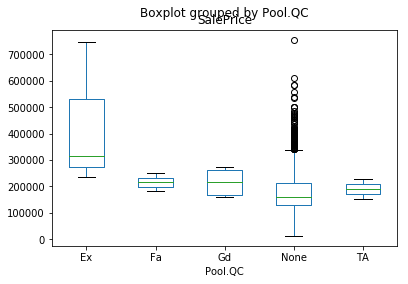

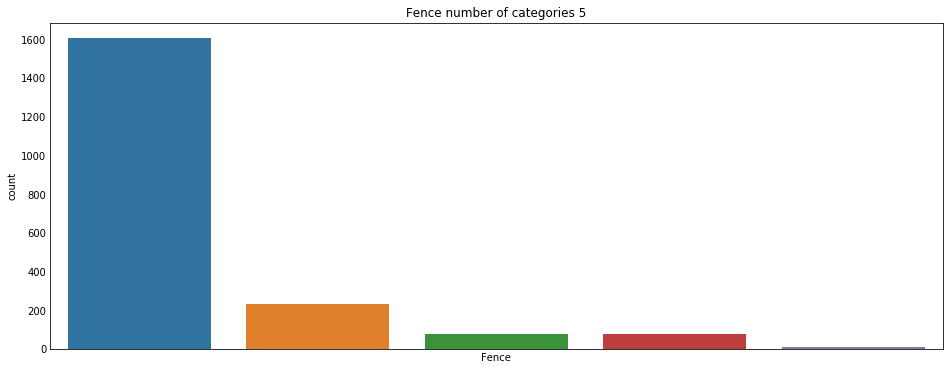

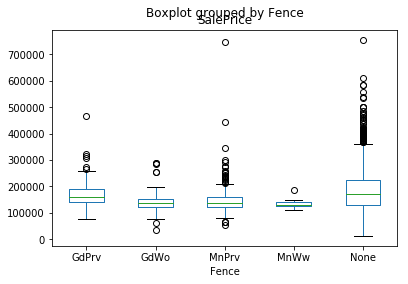

In [12]:
ordinals = variables[['Lot.Shape', 'Utilities', 'Land.Slope','Overall.Qual',
                     'Overall.Cond', 'Exter.Qual', 'Exter.Cond',
                     'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure',
                     'BsmtFin.Type.1', 'BsmtFin.Type.2', 
                      'Heating.QC', 'Electrical', 'Kitchen.Qual',
                     'Functional', 'Fireplace.Qu', 'Garage.Finish',
                     'Garage.Qual', 'Garage.Cond','Paved.Drive',
                     'Pool.QC', 'Fence']].copy()

for cat in list(ordinals):
    print("Category: "+str(cat))
    showCategoryHist(ordinals, str(cat))
    showBoxPlot(col=str(cat), dataframe=ordinals.join(price))

# Choosing categorical ordinals

In [13]:
def mapOrdinals(df, mapping, name):
    df[name] = df[name].map(mapping)
        
#Choosing by oridnary by distribtution and number of categories. 
#Low variance, Mean values of target connected with ordinals should have positive influnce on the model without 
# adding unneccessary complexity.

# The most informative (distribution, mean, variance, outliers) about building:

# ovelall quality 
# Overall Qual (Ordinal): Rates the overall material and finish of the house

#        10	Very Excellent
#        9	Excellent
#        8	Very Good
#        7	Good
#        6	Above Average
#        5	Average
#        4	Below Average
#        3	Fair
#        2	Poor
#        1	Very Poor



# basment info - basemant quality
# Bsmt Qual (Ordinal): Evaluates the height of the basement

#        Ex	Excellent (100+ inches)	
#        Gd	Good (90-99 inches)
#        TA	Typical (80-89 inches)
#        Fa	Fair (70-79 inches)
#        Po	Poor (<70 inches
#        NA	No Basement
# Linear ordinal encoding, could not be good because excelent has values 100+ 
# One hot encoding

ordinals_choosed = ordinals[['Overall.Qual', 'Bsmt.Qual', 'Exter.Qual', 'Kitchen.Qual', 'Fireplace.Qu', 'Heating.QC']]
ordinals_choosed = pd.get_dummies(ordinals_choosed, columns=['Bsmt.Qual'])

# bulding materials - ext quality

# Exter Qual (Ordinal): Evaluates the quality of the material on the exterior 
		
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor

mappingExtQual = {
       'Ex': 5,
       'Gd': 4,
       'TA': 3,
       'Fa': 2,
       'Po': 1
    }
                     
mapOrdinals(ordinals_choosed,mappingExtQual, 'Exter.Qual')


# inside rooms - kitchen quality

# KitchenQual (Ordinal): Kitchen quality

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor

mappingKitchenQual = {
       'Ex': 5,
       'Gd': 4,
       'TA': 3,
       'Fa': 2,
       'Po': 1
    }


mapOrdinals(ordinals_choosed,mappingKitchenQual, 'Kitchen.Qual')


#Fire Place Qu

# FireplaceQu (Ordinal): Fireplace quality

#        Ex	Excellent - Exceptional Masonry Fireplace
#        Gd	Good - Masonry Fireplace in main level
#        TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
#        Fa	Fair - Prefabricated Fireplace in basement
#        Po	Poor - Ben Franklin Stove
#        NA	No Fireplace

mappingFirePlaceQu = {
       'Ex': 5,
       'Gd': 4,
       'TA': 3,
       'Fa': 2,
       'Po': 1,
       'None':0
    }

mapOrdinals(ordinals_choosed,mappingFirePlaceQu, 'Fireplace.Qu')

#Garage - the problem too less data for excelent garages category
# Garage finish

# Garage Finish (Ordinal)	: Interior finish of the garage

#        Fin	Finished
#        RFn	Rough Finished	
#        Unf	Unfinished
#        NA	No Garage

mappingGarageFin = {
       'Fin': 4,
       'RFn': 3,
       'Unf': 2,
        'None': 0
    }
#mapOrdinals(ordinals_choosed,mappingGarageFin, 'Garage.Finish')


# HeatingQC

# HeatingQC (Ordinal): Heating quality and condition

#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor

mappingHQC = {
       'Ex': 5,
       'Gd': 4,
       'TA': 3,
       'Fa': 2,
       'Po': 1
    }
mapOrdinals(ordinals_choosed,mappingHQC, 'Heating.QC')


ordinals_choosed.head(8)

#print(ordinals_choosed.groupby(['Garage.Finish']).size())

,Overall.Qual,Exter.Qual,Kitchen.Qual,Fireplace.Qu,Heating.QC,Bsmt.Qual_Ex,Bsmt.Qual_Fa,Bsmt.Qual_Gd,Bsmt.Qual_None,Bsmt.Qual_Po,Bsmt.Qual_TA
0,6,4,4,4,5,0,0,1,0,0,0
1,4,3,3,0,3,0,0,0,0,0,1
2,5,3,3,0,4,0,0,1,0,0,0
3,5,3,3,0,3,0,0,0,1,0,0
4,9,3,4,0,5,1,0,0,0,0,0
5,4,3,2,0,5,0,1,0,0,0,0
6,8,4,4,2,5,0,0,1,0,0,0
7,4,3,3,0,5,0,0,0,0,0,1


# Correlation matrix as heatmap of variables

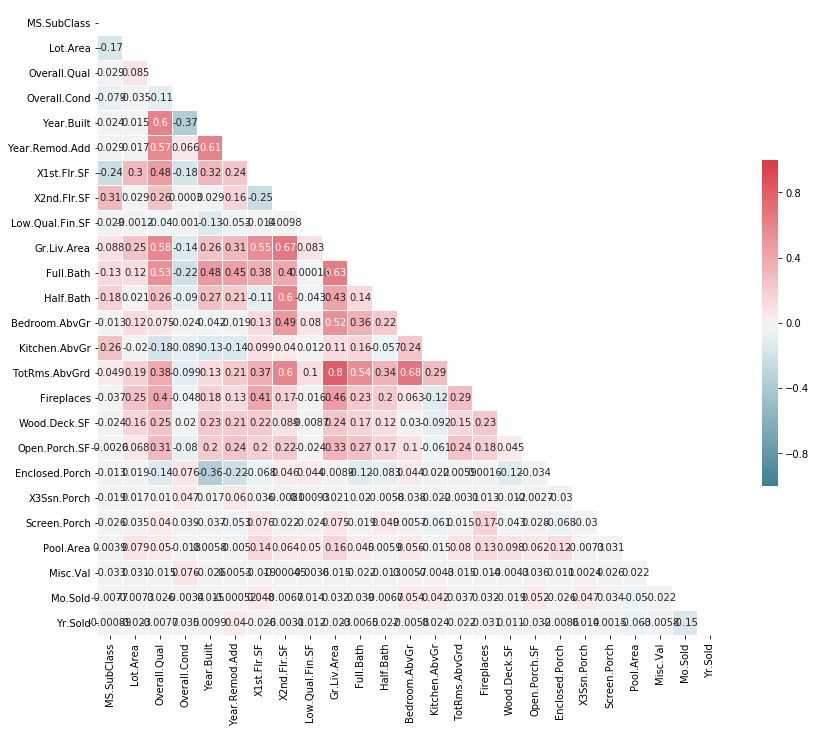

In [14]:
def drawCorrHeatMap(df):
    # Compute the correlation matrix
    corr = df.join(price).corr()

    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(14, 12))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,square=True,annot=True, linewidths=.5, cbar_kws={"shrink": .5})
    
drawCorrHeatMap(variables)

# Numeric variables


In [15]:
numeric = variables.select_dtypes(include=['int64'])  

#removed because they are used as ordinals
numeric.pop("Overall.Qual")
numeric.pop("Overall.Cond")

print(numeric.columns)


Index(['MS.SubClass', 'Lot.Area', 'Year.Built', 'Year.Remod.Add',
       'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Gr.Liv.Area',
       'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr',
       'TotRms.AbvGrd', 'Fireplaces', 'Wood.Deck.SF', 'Open.Porch.SF',
       'Enclosed.Porch', 'X3Ssn.Porch', 'Screen.Porch', 'Pool.Area',
       'Misc.Val', 'Mo.Sold', 'Yr.Sold'],
      dtype='object')


# Histograms of Numeric

Index(['MS.SubClass', 'Lot.Area', 'X1st.Flr.SF', 'X2nd.Flr.SF',
       'Low.Qual.Fin.SF', 'Gr.Liv.Area', 'Kitchen.AbvGr', 'Fireplaces',
       'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch', 'X3Ssn.Porch',
       'Screen.Porch', 'Pool.Area', 'Misc.Val'],
      dtype='object')


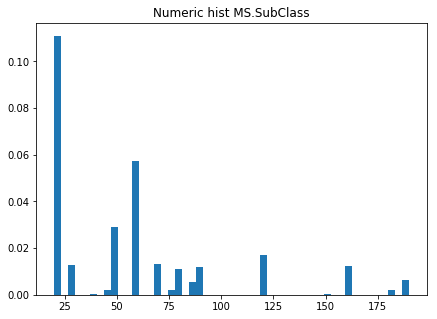

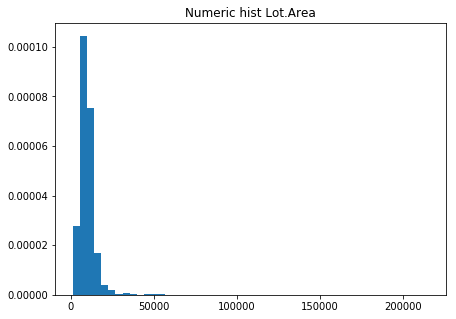

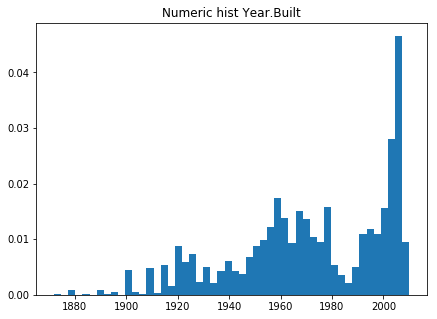

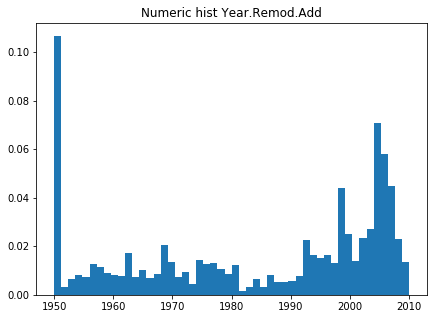

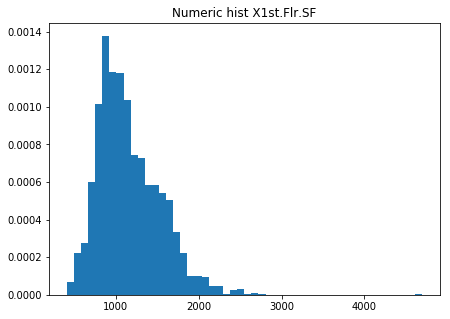

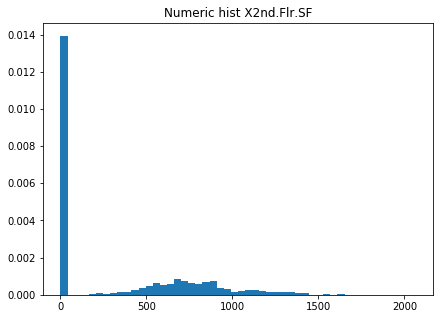

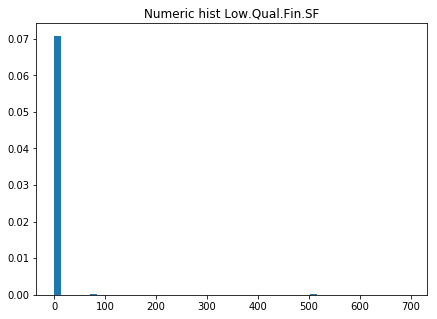

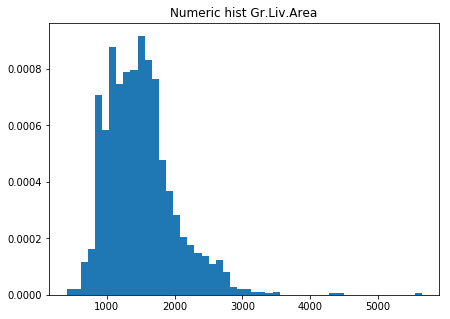

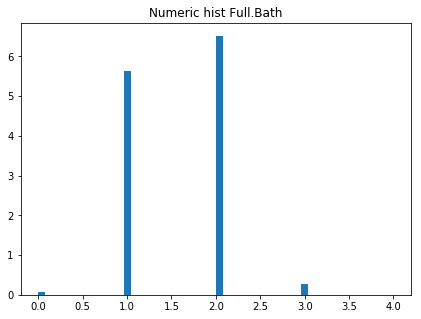

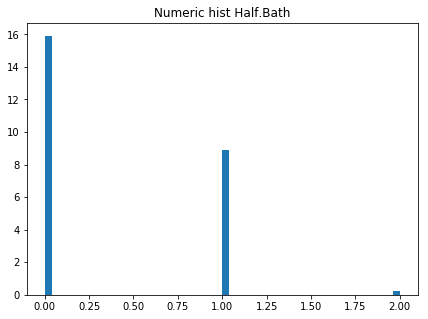

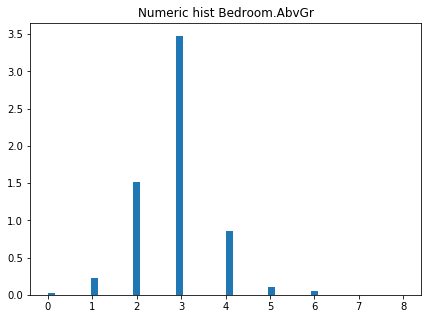

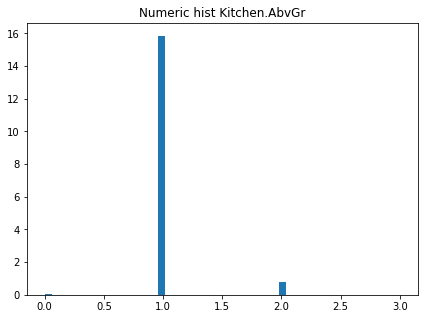

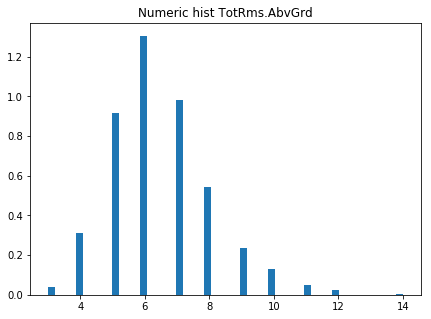

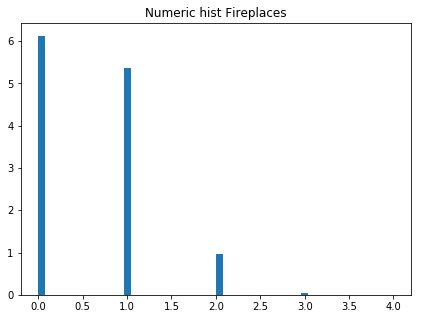

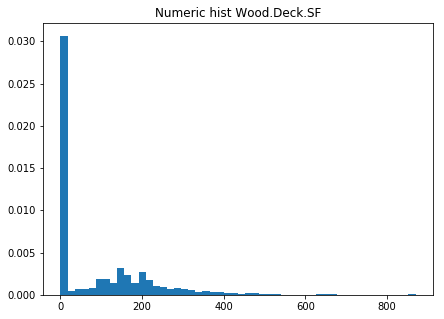

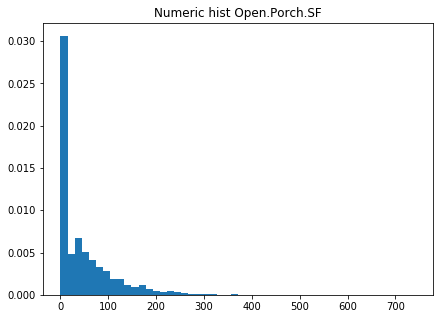

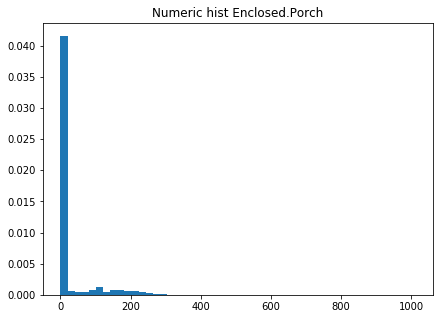

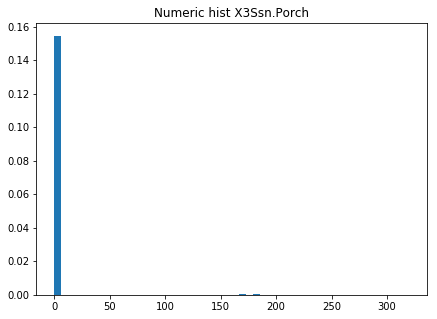

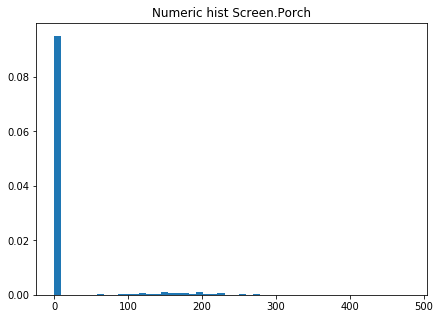

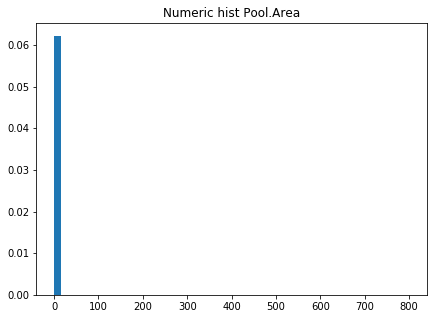

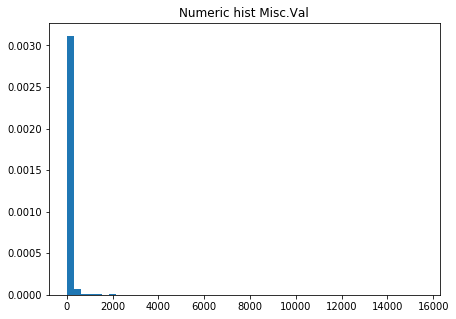

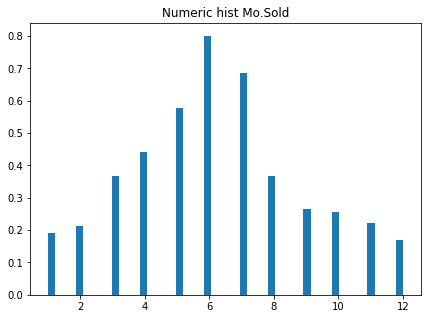

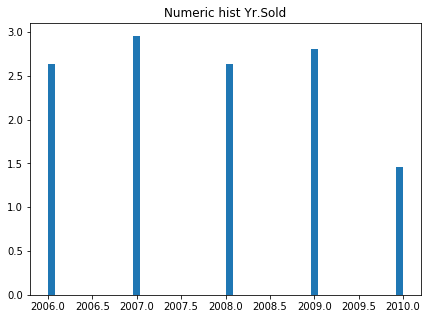

In [16]:
from scipy.stats import skew

skewed_feats = numeric.apply(lambda x: skew(x.dropna())) 
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

print(skewed_feats)

variables[skewed_feats]

for var in numeric:
    plt.figure(figsize=(7, 5))


    plt.hist(numeric[var], 50, density=True)
    plt.title("Numeric hist " + str(var))
    



def logColumn(var, df):    
    df[var] = np.log(df[var])
    
    plt.figure(figsize=(7, 5))


    plt.hist(df[var], 50, density=True)

    plt.xlabel(str(var))
    plt.ylabel('count')
    plt.tight_layout()
    plt.title("After log / skewed")


#  Numeric Count zeros

In [17]:
zeros =numeric[numeric==0].sum()
z = numeric.applymap(lambda x: x == 0).sum(axis = 0)

print(z)


MS.SubClass           0
Lot.Area              0
Year.Built            0
Year.Remod.Add        0
X1st.Flr.SF           0
X2nd.Flr.SF        1150
Low.Qual.Fin.SF    1973
Gr.Liv.Area           0
Full.Bath            10
Half.Bath          1272
Bedroom.AbvGr         6
Kitchen.AbvGr         3
TotRms.AbvGrd         0
Fireplaces          980
Wood.Deck.SF       1064
Open.Porch.SF       901
Enclosed.Porch     1678
X3Ssn.Porch        1977
Screen.Porch       1824
Pool.Area          1989
Misc.Val           1928
Mo.Sold               0
Yr.Sold               0
dtype: int64


# Numeric choose

In [18]:
numeric_choosed = numeric[[
    'MS.SubClass', 
    'Lot.Area', 
    'Year.Built', 
    #'Year.Remod.Add', # - from corelation matrix highly correlated
    'X1st.Flr.SF', 
    'X2nd.Flr.SF', # - from corelation matrix highly correlated
    # 'Low.Qual.Fin.SF',  more than 95% zeros
    #'Gr.Liv.Area',  #- from corelation matrix highly correlated
    #'Full.Bath', #- from corelation matrix highly correlated
    #'Half.Bath', # - from corelation matrix highly correlated
    #'Bedroom.AbvGr',  - from corelation matrix highly correlated
    'Kitchen.AbvGr',
    'TotRms.AbvGrd', 
    'Fireplaces', # - from corelation matrix highly correlated
    #remove porch columns , too many zeros , eventually needed new variable for porch
    'Wood.Deck.SF', 
    'Open.Porch.SF',
    'Enclosed.Porch', 
    'X3Ssn.Porch', 
    'Screen.Porch',
    
    #'Pool.Area',  more than 95% zeros - 
    #'Misc.Val',  more than 95% zeros
    
    'Mo.Sold', 
    'Yr.Sold'
]]



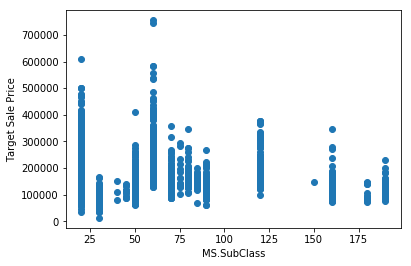

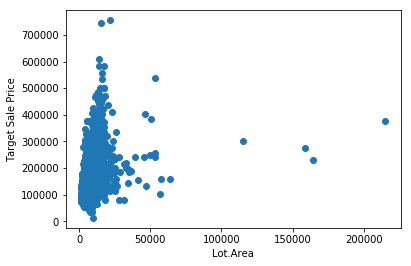

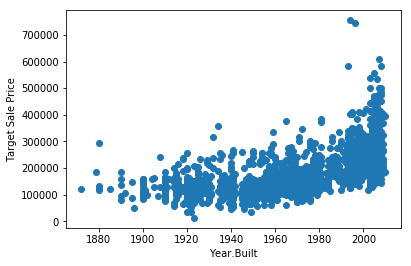

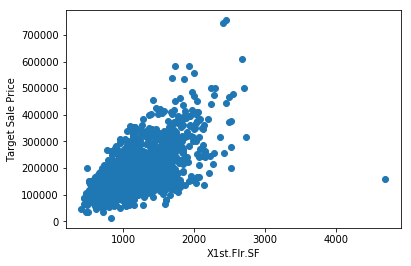

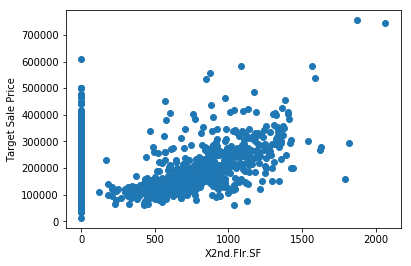

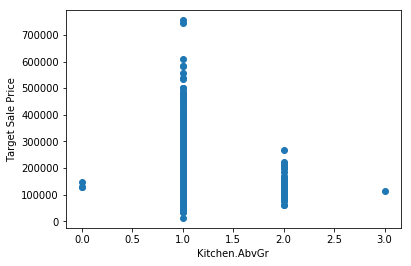

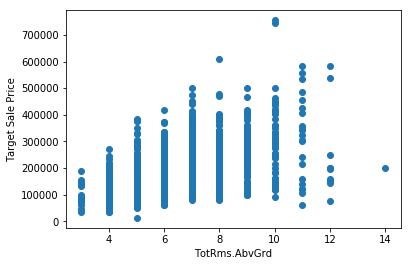

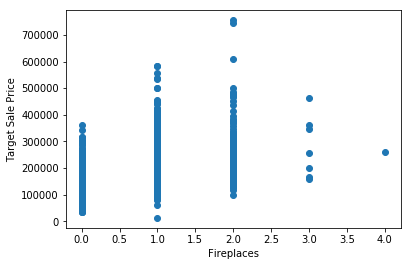

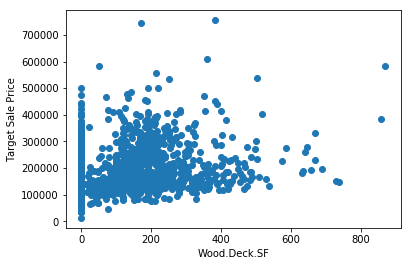

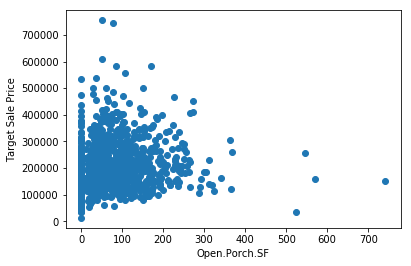

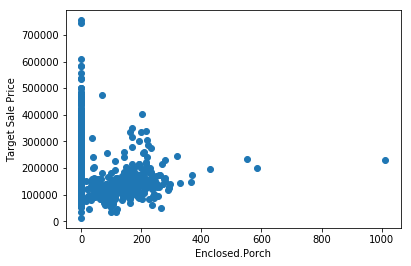

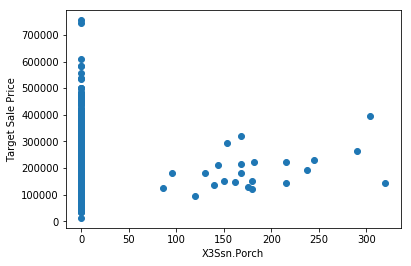

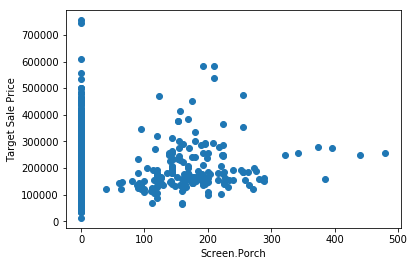

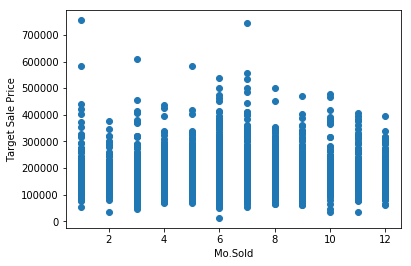

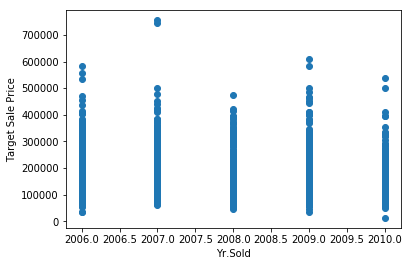

In [19]:
for n in numeric_choosed:
    plt.figure()
    plt.scatter(numeric[n].values, price.values)
    plt.xlabel(str(n))
    plt.ylabel('Target Sale Price')

# Log on skewed

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


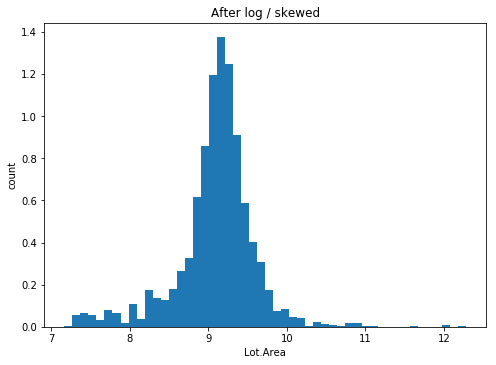

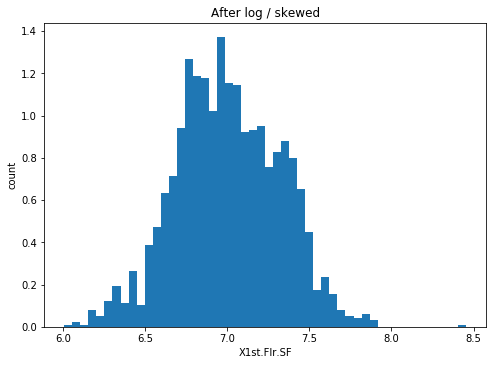

In [20]:
logColumn('Lot.Area', numeric_choosed)
logColumn('X1st.Flr.SF', numeric_choosed)

# Join selected all variables

In [21]:

variables_choosed = pd.concat([numeric_choosed,nominal_choosed, ordinals_choosed], axis=1)

variables_choosed.head(8)

,MS.SubClass,Lot.Area,Year.Built,X1st.Flr.SF,X2nd.Flr.SF,Kitchen.AbvGr,TotRms.AbvGrd,Fireplaces,Wood.Deck.SF,Open.Porch.SF,...,Exter.Qual,Kitchen.Qual,Fireplace.Qu,Heating.QC,Bsmt.Qual_Ex,Bsmt.Qual_Fa,Bsmt.Qual_Gd,Bsmt.Qual_None,Bsmt.Qual_Po,Bsmt.Qual_TA
0,120,8.268988,2005,7.171657,0,1,5,1,110,50,...,4,4,4,5,0,0,1,0,0,0
1,20,9.035987,1970,6.782192,0,1,4,0,240,0,...,3,3,0,3,0,0,0,0,0,1
2,85,8.881836,1972,6.643790,0,1,5,0,192,0,...,3,3,0,4,0,0,1,0,0,0
3,90,8.856234,1979,7.336286,0,2,8,0,0,0,...,3,3,0,3,0,0,0,1,0,0
4,60,9.696402,2006,7.130099,1347,1,9,0,240,154,...,3,4,0,5,1,0,0,0,0,0
5,20,8.361708,1946,6.556778,0,1,4,0,0,0,...,3,2,0,5,0,1,0,0,0,0
6,20,9.906682,1976,7.463363,0,1,5,2,646,0,...,4,4,2,5,0,0,1,0,0,0
7,20,8.881836,1950,6.761573,0,1,5,0,0,0,...,3,3,0,5,0,0,0,0,0,1


# 3. Dealing with NAN / wrong types.

In [22]:
variables_choosed[variables_choosed.columns] = variables_choosed[variables_choosed.columns].apply(pd.to_numeric, errors='coerce')
variables_choosed.fillna(variables_choosed.median(),inplace=True)

# Reshape dataset

In [23]:
from sklearn.model_selection import train_test_split

catCols = list(obj_df)

X_df = variables_choosed

X = X_df.iloc[:,:].values
Y = price.values
print('')

# Target values log 

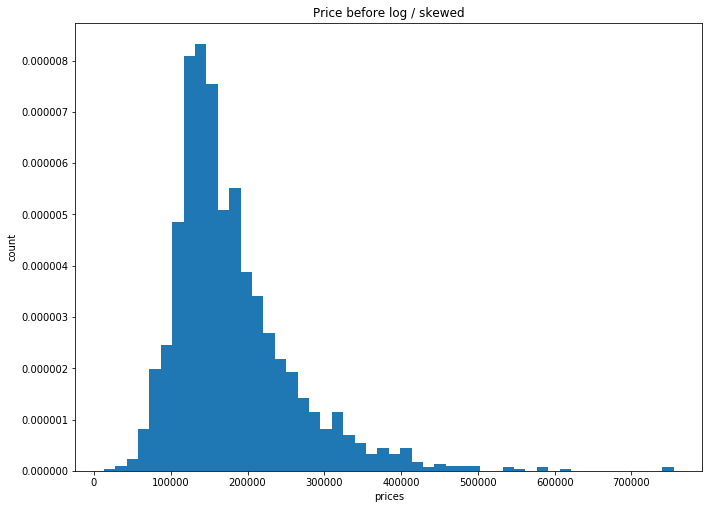

In [24]:

plt.figure(figsize=(10, 7))

plt.hist(price.values, 50, density=True)

plt.xlabel('prices')
plt.ylabel('count')
plt.tight_layout()
plt.title("Price before log / skewed")

#log of price - dstribution of price is left-skewed
Y = np.log(price.values)

Text(0.5, 1.0, 'Price  after log')

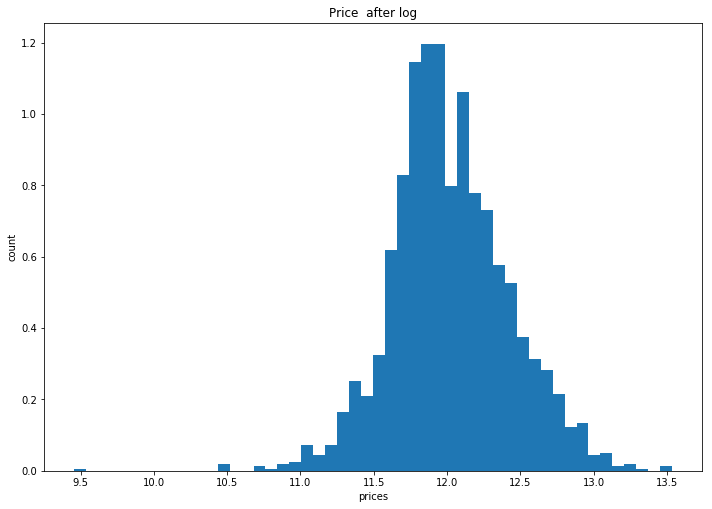

In [25]:
plt.figure(figsize=(10, 7))


plt.hist(Y, 50, density=True)

plt.xlabel('prices')
plt.ylabel('count')
plt.tight_layout()
plt.title("Price  after log")

# 4. Learning Models and Evaluating 

# Linear Regression

In [26]:

lin_reg = LinearRegression()


# Linear Regression Regularization 

alpha : {float, array-like}, shape (n_targets)
Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization. Alpha corresponds to C^-1 in other linear models such as LogisticRegression or LinearSVC. If an array is passed, penalties are assumed to be specific to the targets. Hence they must correspond in number.

# Ridge

In [27]:

lin_reg_ridge = linear_model.Ridge(alpha=69.519)
#calculation of best alpa below in section Alpha parameter choosing


#  Lasso

In [28]:

lin_reg_lasso = linear_model.Lasso(alpha=0.001623)
#calculation of best alpa below in section Alpha parameter choosing


# Metrics function definitions

In [29]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def BIAS(y_true, y_pred): 
    return np.mean(y_true - y_pred)

def MAE_2(y_true, y_pred): 
    #y_true, y_pred = check_arrays(y_true, y_pred)
    return np.mean(np.abs(y_true - y_pred))

def RMSE(y_true,y_pred):
    return np.sqrt(MSE(y_true, y_pred))

def errorMetrics(y_test,y_pred, name):
    print(name)
    print("Mean Absolute Error= "+ str(MAE(y_test, y_pred)))
    print("Bias= "+ str(BIAS(y_test, y_pred)))
    print("Mean Squared Error=" +str(MSE(y_test, y_pred)))
    print("Mean Absolute Percentage Error= " +str(MAPE(y_test, y_pred)))
    print('RMSE:', np.sqrt(MSE(y_test, y_pred)))
    print("R2_score= "+ str(r2_score(y_test,y_pred)))
    print()
    pass

# Alpha parameter choosing, Crossvalidation

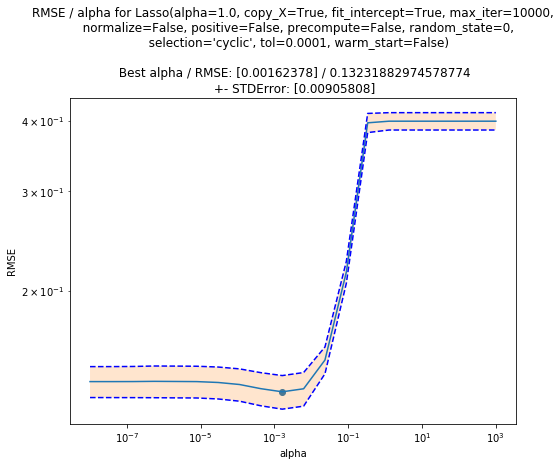

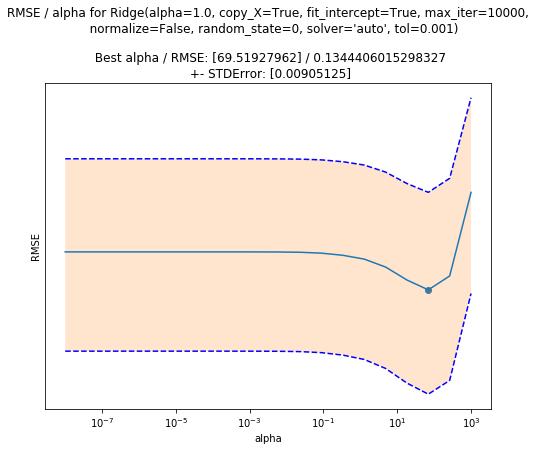

In [30]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler



import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

scaler = StandardScaler()

lasso = linear_model.Lasso(random_state=0, max_iter=10000)
ridge = linear_model.Ridge(random_state=0, max_iter=10000)
alphas = np.logspace(-8, 3, 20)

#create RMSE scorer
rmseScorer = make_scorer(RMSE)

def plotScorePerAlpha(model): 
    tuned_parameters = [{'alpha': alphas}]
    n_folds = 5
    
    X1 = X.copy()
    #choose RMSE scorer explicite
    clf = GridSearchCV(model, tuned_parameters, cv=n_folds, refit=False, n_jobs= -1, scoring = rmseScorer)
    clf.fit(scaler.fit_transform(X1), Y)
   
    scores = clf.cv_results_['mean_test_score']
    scores_std = clf.cv_results_['std_test_score']
    
    plt.figure().set_size_inches(8, 6)
    plt.loglog(alphas, scores)
   
    plt.ylabel('RMSE')
    plt.xlabel('alpha')
    
    ymin = min(scores)
    xpos = np.where(scores == ymin)
    xmin = alphas[xpos]

    plt.scatter(xmin,ymin, marker='o')

    # plot error lines showing +/- std. errors of the scores
    std_error = scores_std / np.sqrt(n_folds)
    
    std_error_min = std_error[xpos]

    plt.loglog(alphas, scores + std_error, 'b--')
    plt.loglog(alphas, scores - std_error, 'b--')

    # alpha=0.2 controls the translucency of the fill color
    plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)
    
    plt.title('RMSE / alpha for '
              + str(model) 
              + '\n\n Best alpha / RMSE: ' 
              + str(xmin) + ' / '
              + str(ymin) 
              + '\n +- STDError: '
              + str(std_error_min))
    
plotScorePerAlpha(lasso)
plotScorePerAlpha(ridge)


#  Learning

Cross Validation improves estimation about accurancy our model on new data unknown data.
Useful for hyperparameter tuning.

Devide into train test: 0.7 train, 0.3 test

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Y_pred_linRegr = lin_reg.fit(X_train, y_train).predict(X_test) 
print('Lin regression computed')

Y_pred_linRegr_ridge = lin_reg_ridge.fit(scaler.fit_transform(X_train), y_train).predict(scaler.fit_transform(X_test)) 
print('Lin regression Ridge computed')

Y_pred_linRegr_lasso = lin_reg_lasso.fit(scaler.fit_transform(X_train), y_train).predict(scaler.fit_transform(X_test)) 
Y_pred_linRegr_lasso = Y_pred_linRegr_lasso.transpose().reshape(-1,1)

print('Lin regression Lasso computed: shape: ' + str(Y_pred_linRegr_lasso.shape))

Lin regression computed
Lin regression Ridge computed
Lin regression Lasso computed: shape: (600, 1)


# Target variable inversion from log - Exponent

In [34]:

Y = np.exp(Y)
y_test=np.exp(y_test)
Y_pred_linRegr = np.exp(Y_pred_linRegr)

Y_pred_linRegr_ridge = np.exp(Y_pred_linRegr_ridge)

Y_pred_linRegr_lasso = np.exp(Y_pred_linRegr_lasso)

    


# 5. Metrics

In [35]:

errorMetrics(y_test, Y_pred_linRegr, 'Linear Regression')
errorMetrics(y_test, Y_pred_linRegr_ridge, 'Linear Regression Ridge')
errorMetrics(y_test, Y_pred_linRegr_lasso, 'Linear Regression Lasso')
#errorMetrics(y_test, Y_pred_random_forest, 'Random Forest')



Linear Regression
Mean Absolute Error= 17792.89753567566
Bias= 1818.2885710015346
Mean Squared Error=1302294532.3811162
Mean Absolute Percentage Error= 9.93519824614937
RMSE: 36087.31816554281
R2_score= 0.8160936499313487

Linear Regression Ridge
Mean Absolute Error= 18795.4036583638
Bias= 8561.884099384857
Mean Squared Error=1164958833.1119616
Mean Absolute Percentage Error= 9.90318561317935
RMSE: 34131.493273983215
R2_score= 0.835487808901314

Linear Regression Lasso
Mean Absolute Error= 18541.86482443685
Bias= 8553.575416715694
Mean Squared Error=1145528020.150695
Mean Absolute Percentage Error= 9.766723164916131
RMSE: 33845.64994427933
R2_score= 0.838231773343858



# 6. Visualize results

In [36]:

print('Linear Regression Coefficients')
coeff_df = pd.DataFrame(lin_reg.coef_[0], X_df.columns, columns=['Coefficient'])
print(coeff_df.sort_values(by=['Coefficient']).head(20))
print(coeff_df.sort_values(by=['Coefficient'], ascending=False).head(20))
#print(lin_reg.coef_)
print('\n\nRidge Linear Regression Coefficients')
coeff_df = pd.DataFrame(lin_reg_ridge.coef_[0], X_df.columns, columns=['Coefficient']) 
coeff_df.apply(np.exp)
print(coeff_df.sort_values(by=['Coefficient']).head(20))
print(coeff_df.sort_values(by=['Coefficient'], ascending=False).head(20))
#print(lin_reg_ridge.coef_)
print('\n\nLasso Linear Regression Coefficients')
coeff_df = pd.DataFrame(lin_reg_lasso.coef_, X_df.columns, columns=['Coefficient'])  
coeff_df.apply(np.exp)
#print(lin_reg_lasso.coef_)
print(coeff_df.sort_values(by=['Coefficient']).head(20))
print(coeff_df.sort_values(by=['Coefficient'], ascending=False).head(20))

print('\n Lasso removed Coefs:')
print(coeff_df.loc[coeff_df['Coefficient'] == 0])




Linear Regression Coefficients
                      Coefficient
MS.Zoning_I (all)       -0.460896
Exterior.1st_BrkComm    -0.429172
Mas.Vnr.Type_CBlock     -0.364081
Exterior.1st_CBlock     -0.279546
Exterior.1st_AsphShn    -0.244312
Roof.Style_Mansard      -0.231597
Condition.2_Artery      -0.209387
Exterior.2nd_Stone      -0.193577
Misc.Feature_TenC       -0.160680
MS.SubClass_80          -0.149210
Condition.2_Feedr       -0.148262
MS.Zoning_C (all)       -0.141126
Foundation_Stone        -0.128716
Neighborhood_NPkVill    -0.119981
House.Style_1Story      -0.112258
Exterior.2nd_AsbShng    -0.104585
Exterior.2nd_Stucco     -0.087281
Roof.Matl_CompShg       -0.086843
Condition.1_RRAe        -0.085495
Heating_OthW            -0.082596
                        Coefficient
Bsmt.Qual_Ex               0.698316
Bsmt.Qual_Gd               0.624194
Bsmt.Qual_TA               0.612907
Bsmt.Qual_Fa               0.591571
Bsmt.Qual_None             0.500716
X1st.Flr.SF                0.391915
Ext

Visualized results of model:  Linear regression


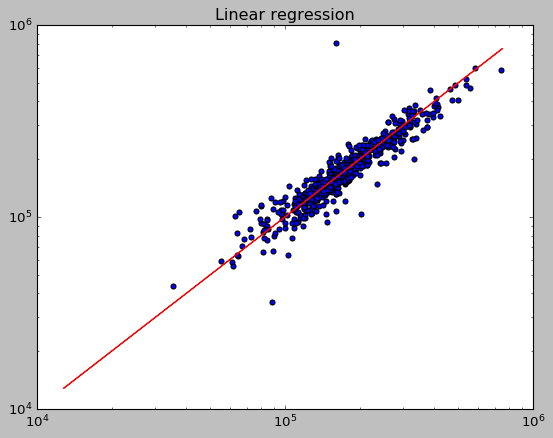

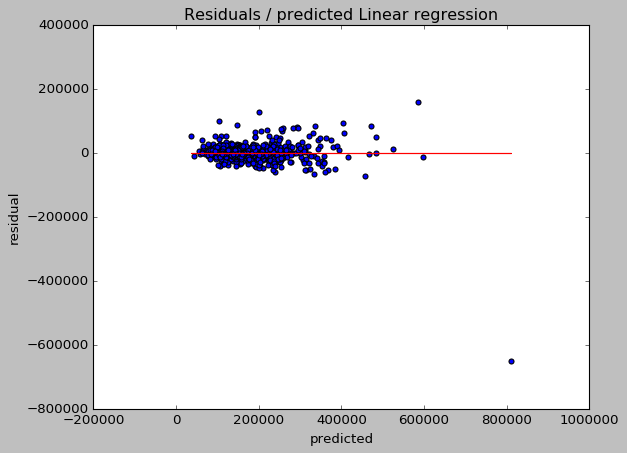

Visualized results of model:  Linear regression Ridge


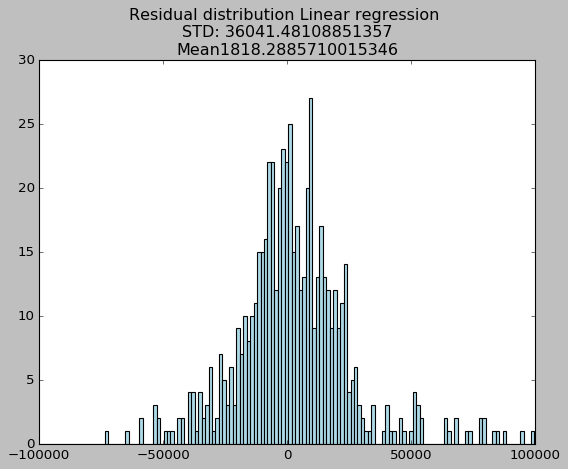

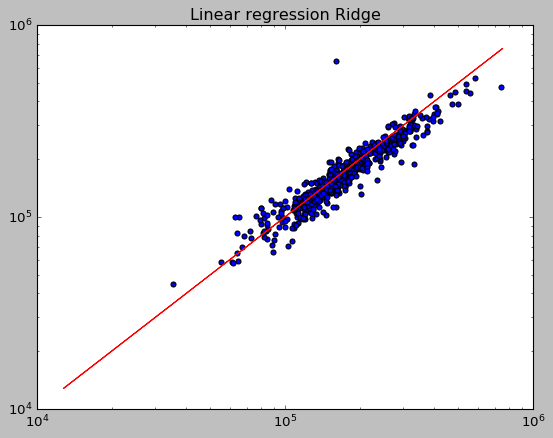

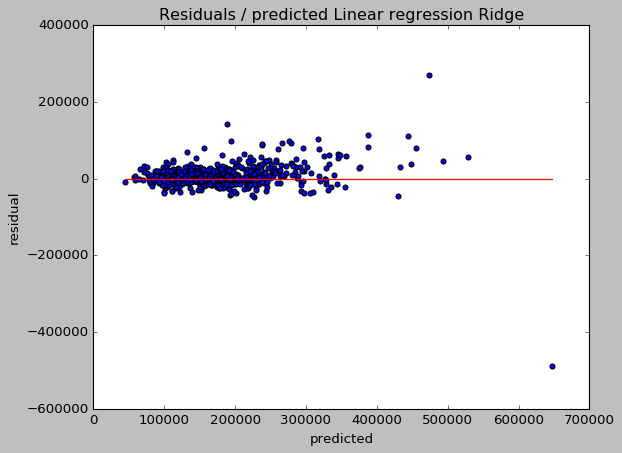

Visualized results of model:  Linear regression Lasso


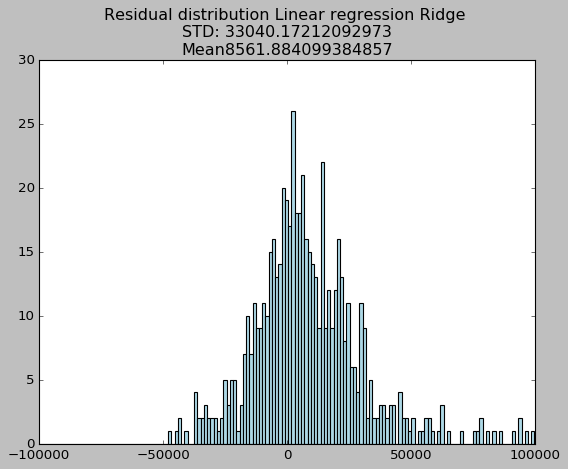

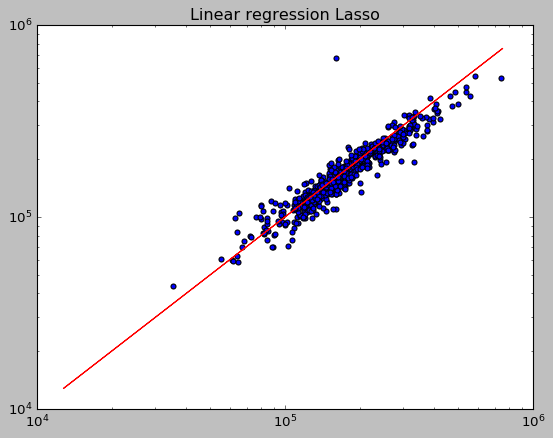

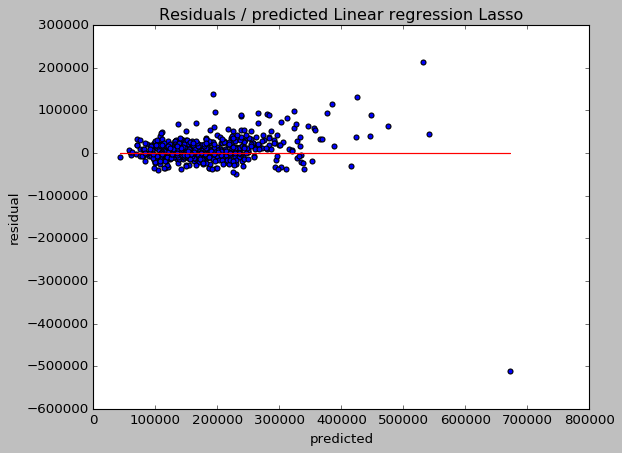

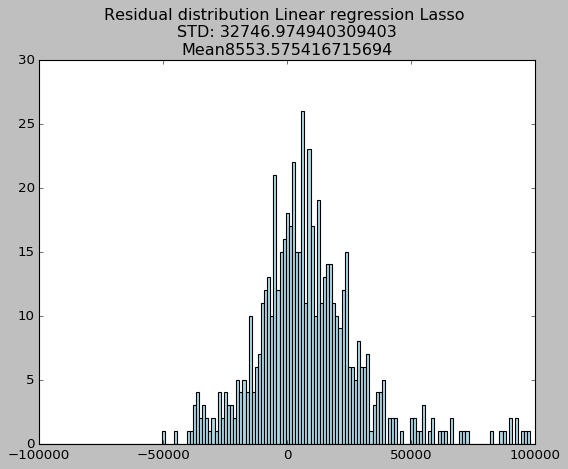

In [37]:
def make_square_axes(ax):
    ax.set_aspect(1 / ax.get_data_ratio())

def visualize(pred, model):
    
    print("Visualized results of model: ",model)
    plt.style.use('classic')
    plt.figure()
    plt.scatter(y_test, pred.ravel())
    plt.title(model)
    ax = plt.gca()
    ax.scatter(y_test ,pred.ravel(), c='blue', alpha=0.01, edgecolors='none')
    #ax.set_yscale('log')
    #ax.set_xscale('log')

    plt.plot(price.values, price.values,'r-')
 
    # Set the scale and limits.
    plt.xscale('log'); 
    plt.xlim([10e3,10e5])
    plt.yscale('log'); 
    plt.ylim([10e3,10e5])

    plt.figure()
  
    residual = y_test-pred
    plt.scatter(pred,residual)
    plt.plot(pred, np.linspace(0,1,600),'r-')
    plt.title('Residuals / predicted '+model)
    plt.xlabel("predicted")
    plt.ylabel("residual")
    plt.show()
    
    plt.figure()
    plt.hist(residual, bins=580,color="lightblue")
    plt.xlim([-10e4,10e4])
    plt.title('Residual distribution '
              + str(model) 
              + ' \nSTD: '+str(np.std(residual)) 
              + '\nMean' + str(np.mean(residual)))

                     
visualize(Y_pred_linRegr,'Linear regression') 

visualize(Y_pred_linRegr_ridge,'Linear regression Ridge')

visualize(Y_pred_linRegr_lasso,'Linear regression Lasso')
  
#visualize(Y_pred_svr_lin,'SVR LIN') 
#visualize(Y_pred_random_forest,'Random Forest') 
#random_forest.feature_importance_ 